In [1]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("kaggle/meta-kaggle")

print("Path to dataset files:", path)

Path to dataset files: /kaggle/input/meta-kaggle


In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import plotly.express as px
import pandas as pd

In [3]:
# Load model-related datasets
datasets = pd.read_csv('/kaggle/input/meta-kaggle/Datasets.csv')
# model_variations = pd.read_csv('/kaggle/input/meta-kaggle/ModelVariations.csv')

/tmp/ipykernel_36/3537409422.py:2: DtypeWarning: Columns (15) have mixed types. Specify dtype option on import or set low_memory=False.
  datasets = pd.read_csv('/kaggle/input/meta-kaggle/Datasets.csv')


In [4]:
# Load competition-related datasets
competition_tags = pd.read_csv('/kaggle/input/meta-kaggle/CompetitionTags.csv')
competitions = pd.read_csv('/kaggle/input/competitions-categorized-csv/competitions_df (1).csv')

In [5]:
# Load Kernel-related datasets
kernel_accelerator_types = pd.read_csv('/kaggle/input/meta-kaggle/KernelAcceleratorTypes.csv')
kernel_languages = pd.read_csv('/kaggle/input/meta-kaggle/KernelLanguages.csv')
kernel_tags = pd.read_csv('/kaggle/input/meta-kaggle/KernelTags.csv')
kernel_version_comp_sources = pd.read_csv('/kaggle/input/meta-kaggle/KernelVersionCompetitionSources.csv')
kernel_version_dataset_sources = pd.read_csv('/kaggle/input/meta-kaggle/KernelVersionDatasetSources.csv')
kernel_version_kernel_sources = pd.read_csv('/kaggle/input/meta-kaggle/KernelVersionKernelSources.csv')
kernel_version_model_sources = pd.read_csv('/kaggle/input/meta-kaggle/KernelVersionModelSources.csv')
kernel_versions = pd.read_csv('/kaggle/input/meta-kaggle/KernelVersions.csv')
kernels = pd.read_csv('/kaggle/input/meta-kaggle/Kernels.csv')

/tmp/ipykernel_36/2238036983.py:9: DtypeWarning: Columns (22) have mixed types. Specify dtype option on import or set low_memory=False.
  kernel_versions = pd.read_csv('/kaggle/input/meta-kaggle/KernelVersions.csv')


In [6]:
print("KernelAcceleratorTypes:", len(kernel_accelerator_types))
print("KernelLanguages:", len(kernel_languages))
print("KernelTags:", len(kernel_tags))
print("KernelVersionCompetitionSources:", len(kernel_version_comp_sources))
print("KernelVersionDatasetSources:", len(kernel_version_dataset_sources))
print("KernelVersionKernelSources:", len(kernel_version_kernel_sources))
print("KernelVersionModelSources:", len(kernel_version_model_sources))
print("KernelVersions:", len(kernel_versions))
print("Kernels:", len(kernels))

KernelAcceleratorTypes: 11
KernelLanguages: 10
KernelTags: 918184
KernelVersionCompetitionSources: 4841638
KernelVersionDatasetSources: 10257973
KernelVersionKernelSources: 1118706
KernelVersionModelSources: 333479
KernelVersions: 15287997
Kernels: 1529204


/tmp/ipykernel_36/2322590977.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  kernel_versions_filtered['Year'] = kernel_versions_filtered['CreationDate'].dt.year


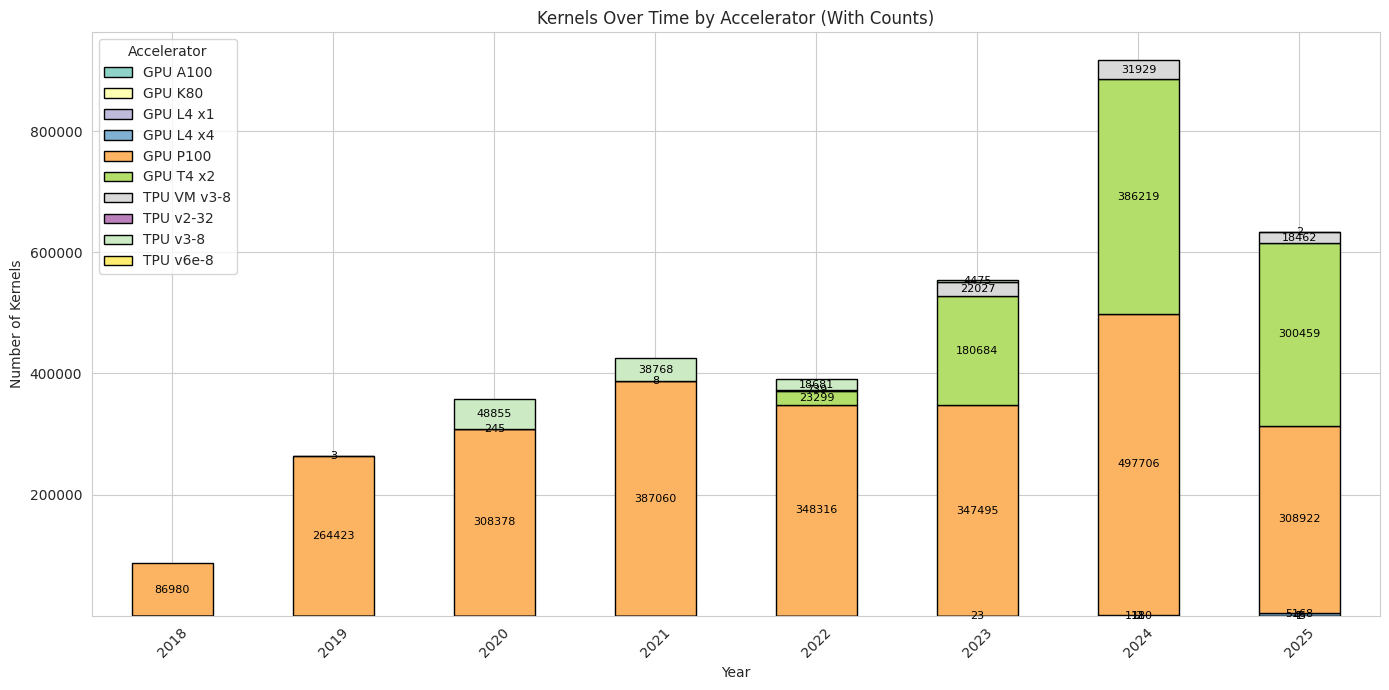

In [7]:
import matplotlib.pyplot as plt
import pandas as pd

# Map Accelerator Id to Labels
accelerator_map = dict(zip(kernel_accelerator_types['Id'], kernel_accelerator_types['Label']))
kernel_versions['Accelerator'] = kernel_versions['AcceleratorTypeId'].map(accelerator_map)

# Convert to datetime
kernel_versions['CreationDate'] = pd.to_datetime(kernel_versions['CreationDate'], errors='coerce')

# Filter out rows with NaN in 'Accelerator'
kernel_versions_filtered = kernel_versions[kernel_versions['Accelerator'].notna()]

# Group by Year and Accelerator
kernel_versions_filtered['Year'] = kernel_versions_filtered['CreationDate'].dt.year
pivot = kernel_versions_filtered.pivot_table(index='Year', columns='Accelerator', values='Id', aggfunc='count')

import matplotlib.pyplot as plt
import seaborn as sns

# Optional: Set a cleaner style
sns.set_style("whitegrid")

# Plot with a cleaner colormap
ax = pivot.plot(kind='bar', 
                stacked=True, 
                figsize=(14, 7), 
                cmap='Set3',  # Clean and readable colors
                edgecolor='black')

# Add counts on bars
for container in ax.containers:
    ax.bar_label(container, label_type='center', fontsize=8, color='black')

plt.ylabel("Number of Kernels")
plt.title("Kernels Over Time by Accelerator (With Counts)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [8]:
len(kernel_versions_filtered)

3630503

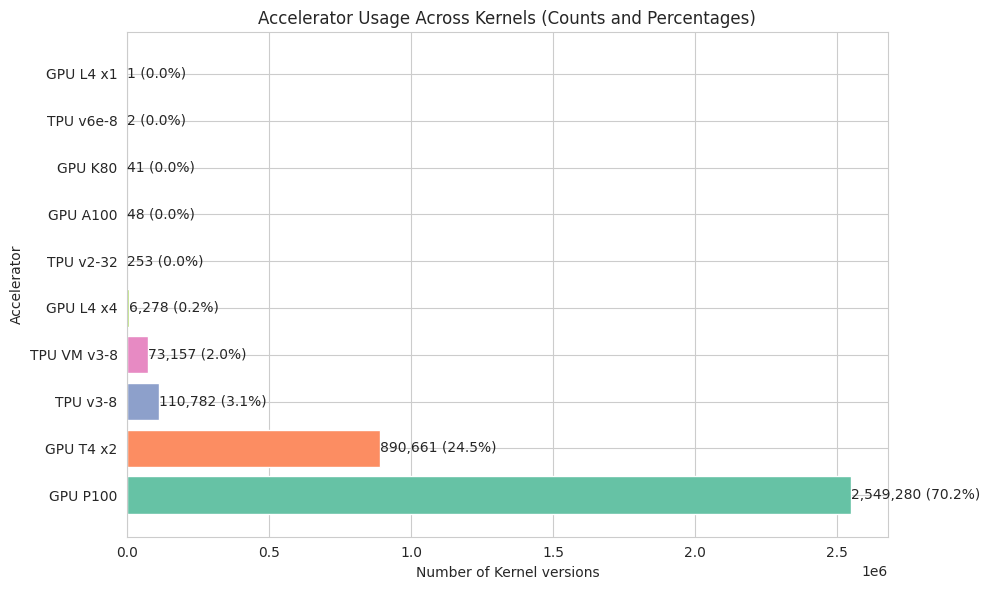

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

# Count total kernels per accelerator
accelerator_counts = kernel_versions_filtered['Accelerator'].value_counts()
accelerator_percent = accelerator_counts / accelerator_counts.sum() * 100

# Create DataFrame for plotting
accel_df = pd.DataFrame({
    'Count': accelerator_counts,
    'Percentage': accelerator_percent.map('{:.1f}%'.format)
})

# Plot
sns.set_style("whitegrid")
fig, ax = plt.subplots(figsize=(10, 6))
bars = ax.barh(accel_df.index, accel_df['Count'], color=sns.color_palette('Set2'))

# Add labels for counts and %
for bar, count, pct in zip(bars, accel_df['Count'], accel_df['Percentage']):
    ax.text(bar.get_width() + 500, bar.get_y() + bar.get_height() / 2,
            f"{count:,} ({pct})", va='center', fontsize=10)

# Titles and labels
plt.xlabel('Number of Kernel versions')
plt.ylabel('Accelerator')
plt.title('Accelerator Usage Across Kernels (Counts and Percentages)')
plt.tight_layout()
plt.show()

## 2️⃣ Programming Language Trends

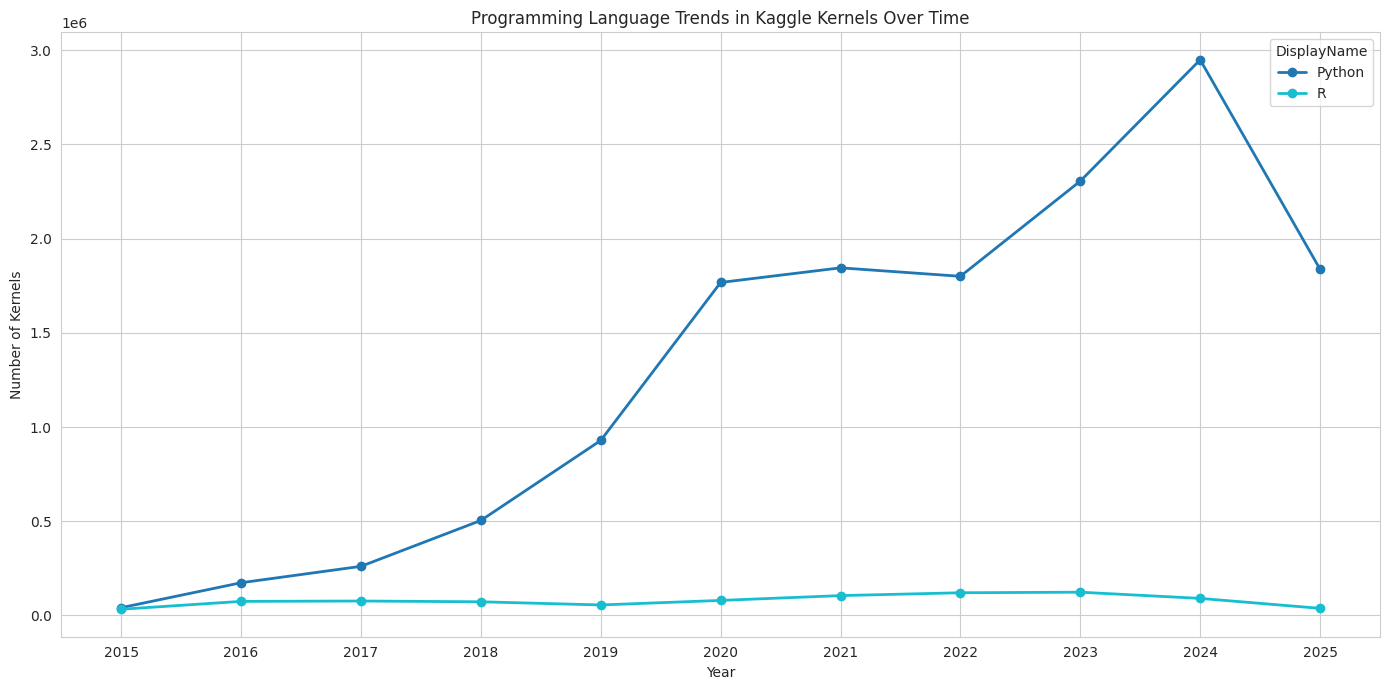

In [10]:
kernel_versions_lang = kernel_versions.merge(
    kernel_languages,
    left_on='ScriptLanguageId',
    right_on='Id',
    how='left'
)

kernel_versions_lang['Year'] = pd.to_datetime(kernel_versions_lang['CreationDate']).dt.year

lang_trends = kernel_versions_lang.groupby(['Year', 'DisplayName']).size().reset_index(name='KernelCount')

pivot_df = lang_trends.pivot(index='Year', columns='DisplayName', values='KernelCount').fillna(0)
import matplotlib.pyplot as plt

pivot_df.plot(kind='line', marker='o', linewidth=2, figsize=(14, 7), colormap='tab10')
plt.title('Programming Language Trends in Kaggle Kernels Over Time')
plt.xlabel('Year')
plt.ylabel('Number of Kernels')
plt.xticks(pivot_df.index)
plt.grid(True)
plt.tight_layout()
plt.show()

/tmp/ipykernel_36/2783298811.py:16: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  engagement_trend = kernels.groupby(['PublicYear', 'ViewBin']).size().unstack(fill_value=0)


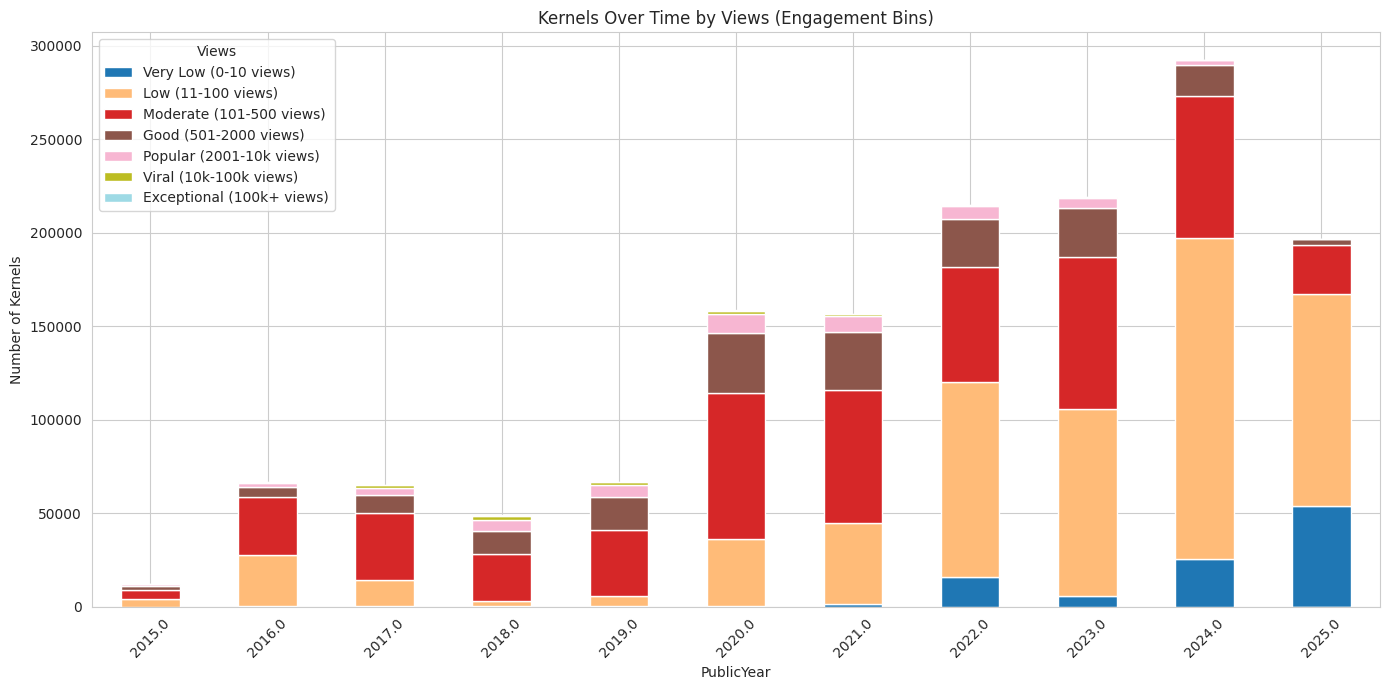

In [11]:
bins = [0, 10, 100, 500, 2000, 10000, 100000, float('inf')]
labels = [
    'Very Low (0-10 views)',
    'Low (11-100 views)',
    'Moderate (101-500 views)',
    'Good (501-2000 views)',
    'Popular (2001-10k views)',
    'Viral (10k-100k views)',
    'Exceptional (100k+ views)'
]

kernels['ViewBin'] = pd.cut(kernels['TotalViews'], bins=bins, labels=labels)

kernels['PublicYear'] = pd.to_datetime(kernels['MadePublicDate'], errors='coerce').dt.year

engagement_trend = kernels.groupby(['PublicYear', 'ViewBin']).size().unstack(fill_value=0)

# Plot
engagement_trend.plot(kind='bar', stacked=True, figsize=(14, 7), colormap='tab20')
plt.title('Kernels Over Time by Views (Engagement Bins)')
plt.xlabel('PublicYear')
plt.ylabel('Number of Kernels')
plt.legend(title='Views')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

/tmp/ipykernel_36/250467665.py:6: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  pivot = kernels.pivot_table(index='Year', columns='ViewBin', values='Id', aggfunc='count').fillna(0)


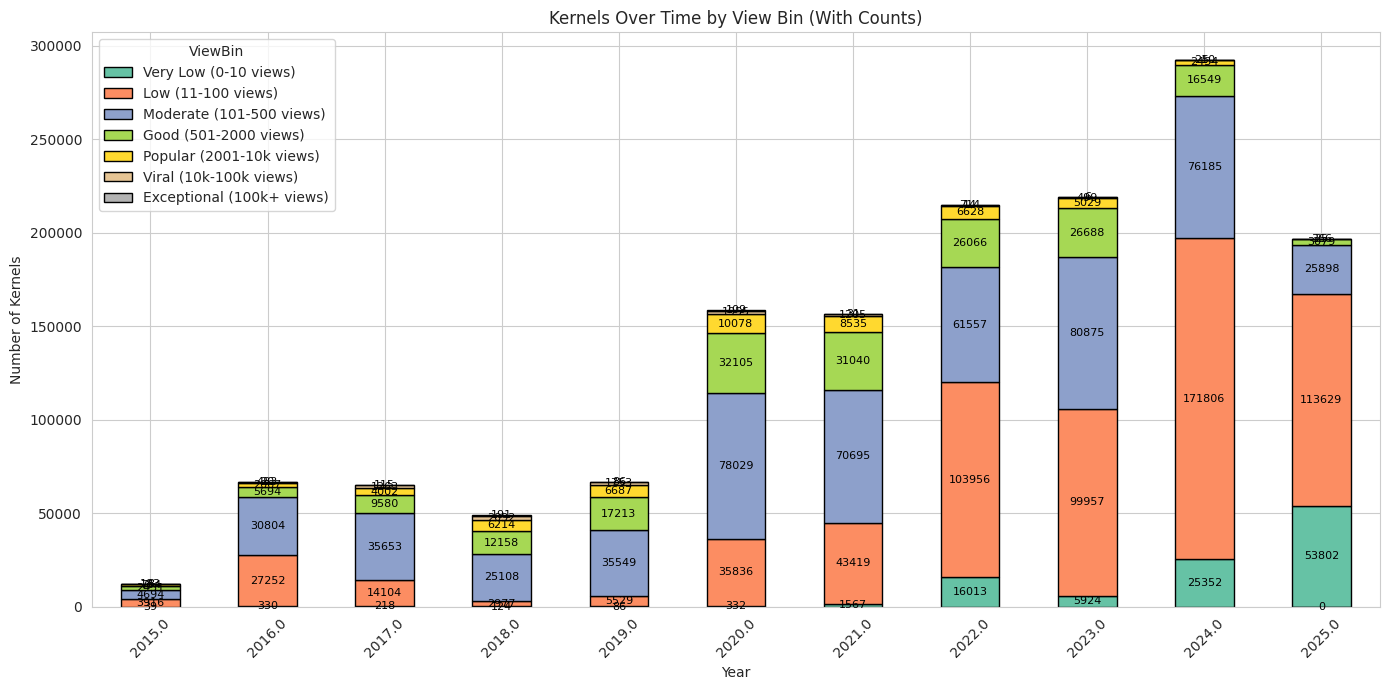

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt

# Ensure your 'Year' and 'ViewBin' columns are ready
kernels['Year'] = pd.to_datetime(kernels['MadePublicDate']).dt.year
pivot = kernels.pivot_table(index='Year', columns='ViewBin', values='Id', aggfunc='count').fillna(0)

# Plot with a clean style
sns.set_style("whitegrid")

ax = pivot.plot(kind='bar',
                stacked=True,
                figsize=(14, 7),
                cmap='Set2',
                edgecolor='black')

# Add count labels on bars
for container in ax.containers:
    ax.bar_label(container, label_type='center', fontsize=8, color='black', fmt='%d')

plt.ylabel("Number of Kernels")
plt.title("Kernels Over Time by View Bin (With Counts)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

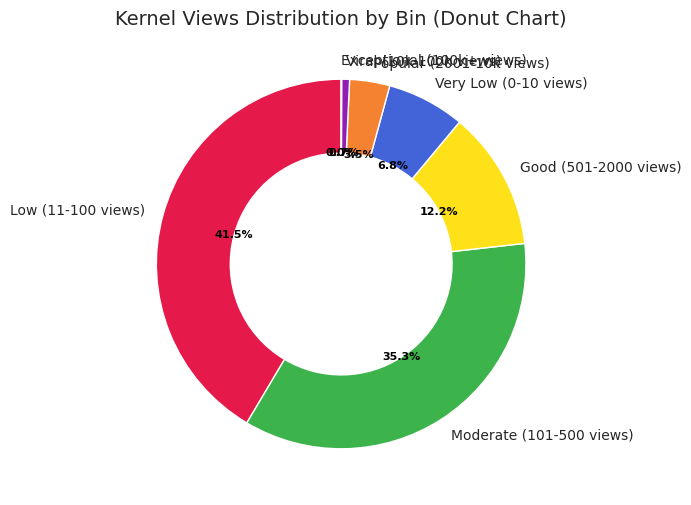

In [13]:
import matplotlib.pyplot as plt

# Prepare your data (replace with your actual data)
view_bin_counts = kernels['ViewBin'].value_counts()

# Define a highly contrasting color palette manually
colors = ['#e6194b', '#3cb44b', '#ffe119', '#4363d8', 
          '#f58231', '#911eb4', '#46f0f0', '#f032e6', 
          '#bcf60c', '#fabebe', '#008080', '#e6beff']

# Create donut chart
fig, ax = plt.subplots(figsize=(8, 6))
wedges, texts, autotexts = ax.pie(view_bin_counts, 
                                  labels=view_bin_counts.index, 
                                  autopct='%1.1f%%', 
                                  startangle=90, 
                                  colors=colors[:len(view_bin_counts)],
                                  wedgeprops=dict(width=0.4))

# Aesthetics
plt.setp(autotexts, size=8, weight='bold', color='black')
ax.set(aspect="equal")
plt.title('Kernel Views Distribution by Bin (Donut Chart)', fontsize=14)

plt.show()

In [14]:
len(kernels)

1529204

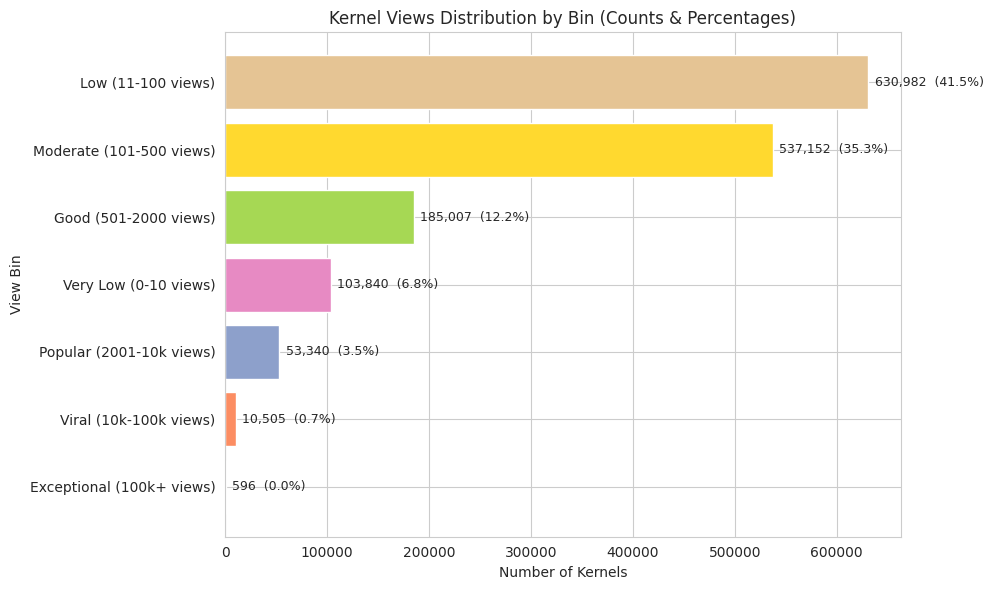

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

# Prepare data
view_bin_counts = kernels['ViewBin'].value_counts().sort_values(ascending=True)
total = view_bin_counts.sum()
percentages = (view_bin_counts / total) * 100

# Plot
plt.figure(figsize=(10, 6))
colors = sns.color_palette('Set2', n_colors=len(view_bin_counts))

bars = plt.barh(view_bin_counts.index, view_bin_counts.values, color=colors)

# Add labels with counts and %
for bar, count, pct in zip(bars, view_bin_counts.values, percentages.values):
    width = bar.get_width()
    label = f'{int(count):,}  ({pct:.1f}%)'
    plt.text(width + max(view_bin_counts.values) * 0.01, 
             bar.get_y() + bar.get_height()/2,
             label, va='center', fontsize=9)

# Aesthetics
plt.xlabel('Number of Kernels')
plt.ylabel('View Bin')
plt.title('Kernel Views Distribution by Bin (Counts & Percentages)')
plt.tight_layout()
plt.show()

## Find which competitions inspired more kernels over time.

In [16]:
# Merge competition sources with kernel versions
comp_kernel_versions = kernel_version_comp_sources.merge(
    kernel_versions[['Id', 'CreationDate']],
    left_on='KernelVersionId', right_on='Id'
)

# Clean up date
comp_kernel_versions['Year'] = pd.to_datetime(comp_kernel_versions['CreationDate']).dt.year

In [17]:
# Merge competition sources with kernel versions
comp_kernel_versions = kernel_version_comp_sources.merge(
    kernel_versions[['Id', 'CreationDate']],
    left_on='KernelVersionId', right_on='Id'
)

# Clean up date
comp_kernel_versions['Year'] = pd.to_datetime(comp_kernel_versions['CreationDate']).dt.year

In [18]:
comp_kernel_count = comp_kernel_versions.groupby(['SourceCompetitionId', 'Year']).size().reset_index(name='KernelCount')


In [19]:
comp_kernel_count = comp_kernel_count.merge(
    competitions[['Id', 'Slug']], left_on='SourceCompetitionId', right_on='Id', how='left'
)

In [20]:
comp_kernel_count.head()

,SourceCompetitionId,Year,KernelCount,Id,Slug
0,2435,2019,7,2435,hivprogression
1,2435,2020,10,2435,hivprogression
2,2435,2021,16,2435,hivprogression
3,2435,2022,7,2435,hivprogression
4,2435,2023,18,2435,hivprogression


In [21]:
comp_kernel_count['KernelCount'].describe()

count      6834.000000
mean        708.458882
std        3452.415973
min           1.000000
25%           7.000000
50%          28.000000
75%         166.750000
max      104320.000000
Name: KernelCount, dtype: float64

In [22]:
bins = [0, 10, 50, 200, 1000, 5000, 10000, float('inf')]
labels = [
    'Very Few (<10)', 
    'Few (10-49)', 
    'Moderate (50-199)', 
    'High (200-999)', 
    'Very High (1K-4.9K)', 
    'Extreme (5K-10K)', 
    'Massive (10K+)'
]

comp_kernel_count['KernelBin'] = pd.cut(comp_kernel_count['KernelCount'], bins=bins, labels=labels)

/tmp/ipykernel_36/181708530.py:5: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  pivot = comp_kernel_count.pivot_table(index='Year', columns='KernelBin', values='SourceCompetitionId', aggfunc='count')


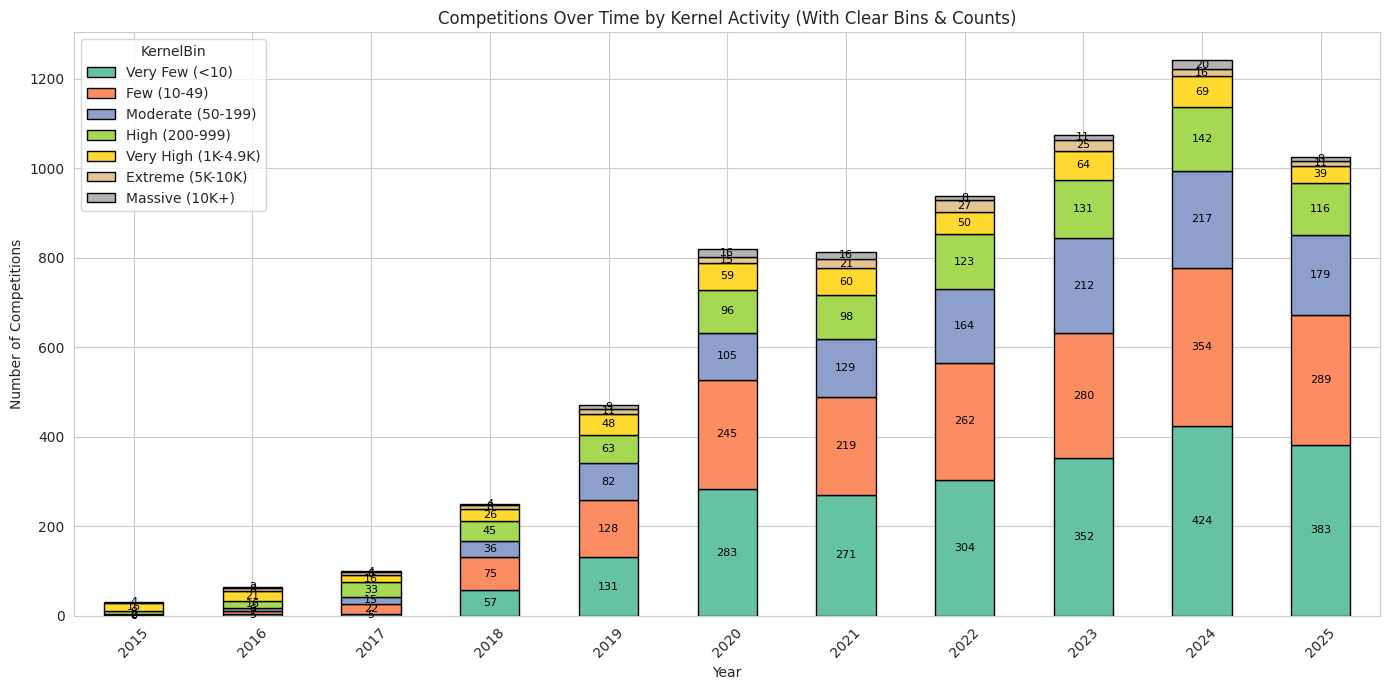

In [23]:
import seaborn as sns
import matplotlib.pyplot as plt

# Pivot for plotting
pivot = comp_kernel_count.pivot_table(index='Year', columns='KernelBin', values='SourceCompetitionId', aggfunc='count')

# Plot
sns.set_style("whitegrid")
ax = pivot.plot(kind='bar',
                stacked=True,
                figsize=(14, 7),
                cmap='Set2',
                edgecolor='black')

# Annotate bars with counts
for container in ax.containers:
    ax.bar_label(container, label_type='center', fontsize=8, color='black')

# Styling
plt.ylabel("Number of Competitions")
plt.title("Competitions Over Time by Kernel Activity (With Clear Bins & Counts)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## Forking Analysis: Original vs. Forked Kernels

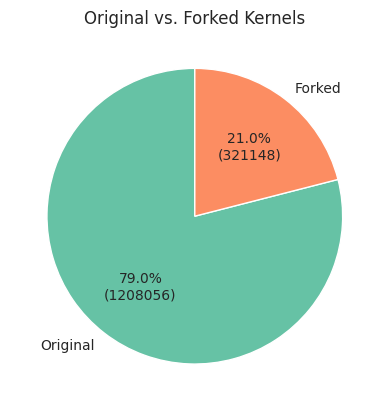

In [24]:
import matplotlib.pyplot as plt
import seaborn as sns

# Mark whether each kernel is forked
kernels['IsForked'] = kernels['ForkParentKernelVersionId'].notna()

# Count of forked vs. original kernels
fork_counts = kernels['IsForked'].value_counts().rename({True: 'Forked', False: 'Original'})

# Custom function to show number and percentage
def autopct_format(pct, allvals):
    absolute = int(round(pct/100.*sum(allvals)))
    return "{:.1f}%\n({:d})".format(pct, absolute)

# Pie chart
fig, ax = plt.subplots()
fork_counts.plot.pie(autopct=lambda pct: autopct_format(pct, fork_counts),
                     startangle=90,
                     colors=['#66c2a5', '#fc8d62'],
                     ylabel='',
                     ax=ax)

plt.title('Original vs. Forked Kernels')
plt.show()

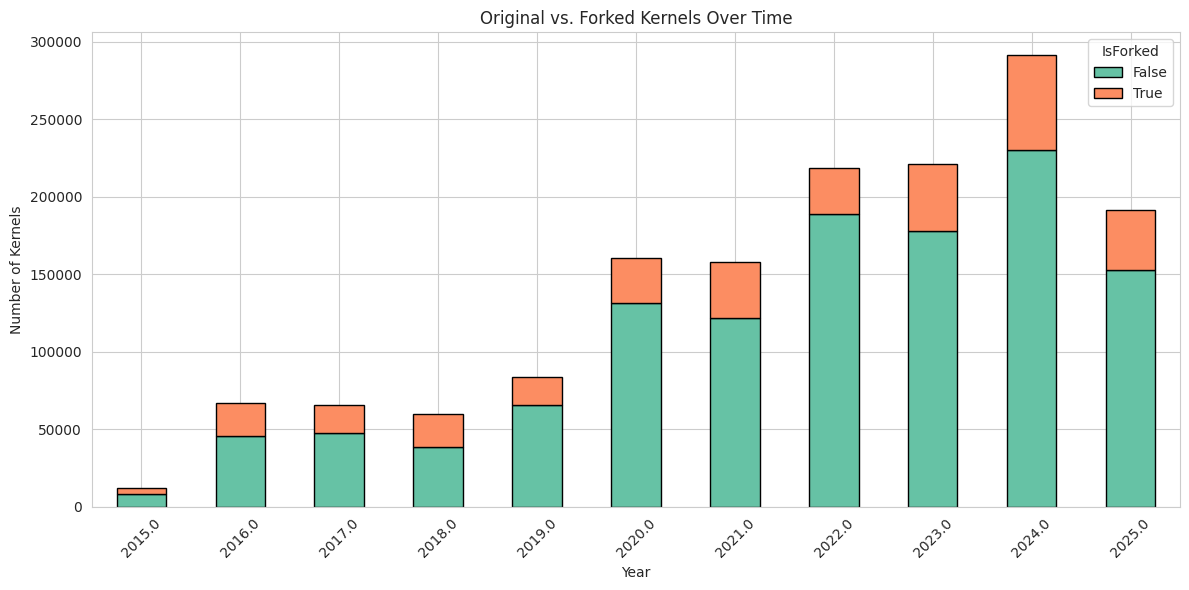

In [25]:
# Extract year
kernels['Year'] = pd.to_datetime(kernels['CreationDate']).dt.year
yearly_forks = kernels.groupby(['Year', 'IsForked']).size().unstack(fill_value=0)

# Plot
yearly_forks.plot(kind='bar', stacked=True, figsize=(12, 6), color=['#66c2a5', '#fc8d62'], edgecolor='black')
plt.title('Original vs. Forked Kernels Over Time')
plt.ylabel('Number of Kernels')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

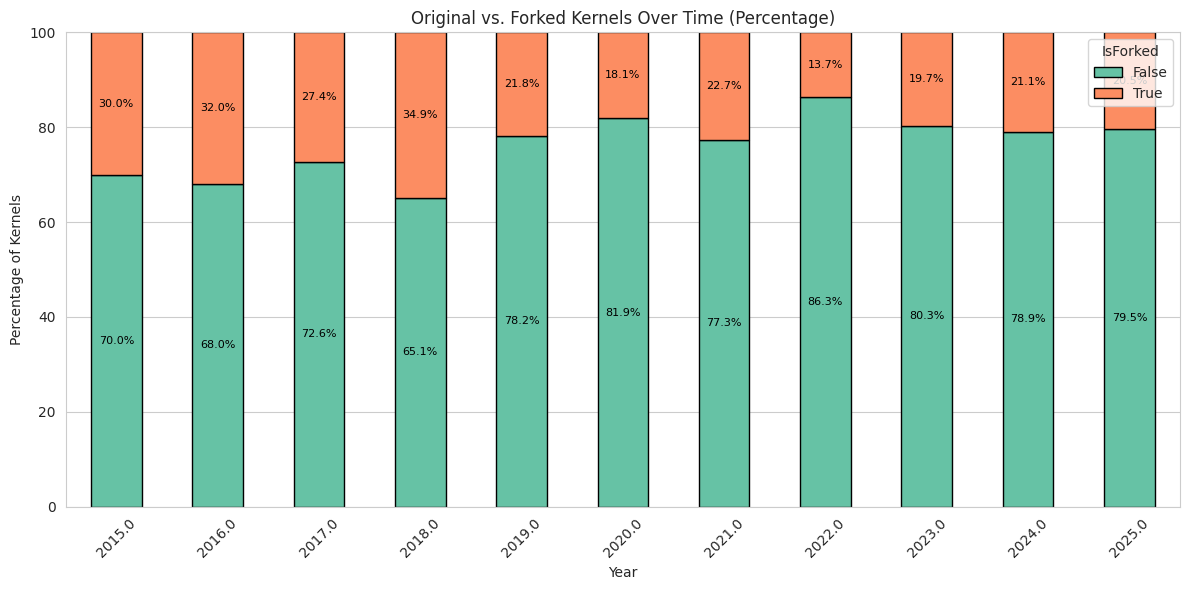

In [26]:
import matplotlib.pyplot as plt

# Extract year
kernels['Year'] = pd.to_datetime(kernels['CreationDate']).dt.year

# Count forks per year
yearly_forks = kernels.groupby(['Year', 'IsForked']).size().unstack(fill_value=0)

# Convert counts to percentages
yearly_forks_percent = yearly_forks.div(yearly_forks.sum(axis=1), axis=0) * 100

# Plot
ax = yearly_forks_percent.plot(kind='bar', 
                               stacked=True, 
                               figsize=(12, 6), 
                               color=['#66c2a5', '#fc8d62'], 
                               edgecolor='black')

# Add % labels on bars
for container in ax.containers:
    ax.bar_label(container, fmt='%.1f%%', label_type='center', fontsize=8, color='black')

plt.title('Original vs. Forked Kernels Over Time (Percentage)')
plt.ylabel('Percentage of Kernels')
plt.xlabel('Year')
plt.xticks(rotation=45)
plt.ylim(0, 100)
plt.tight_layout()
plt.show()

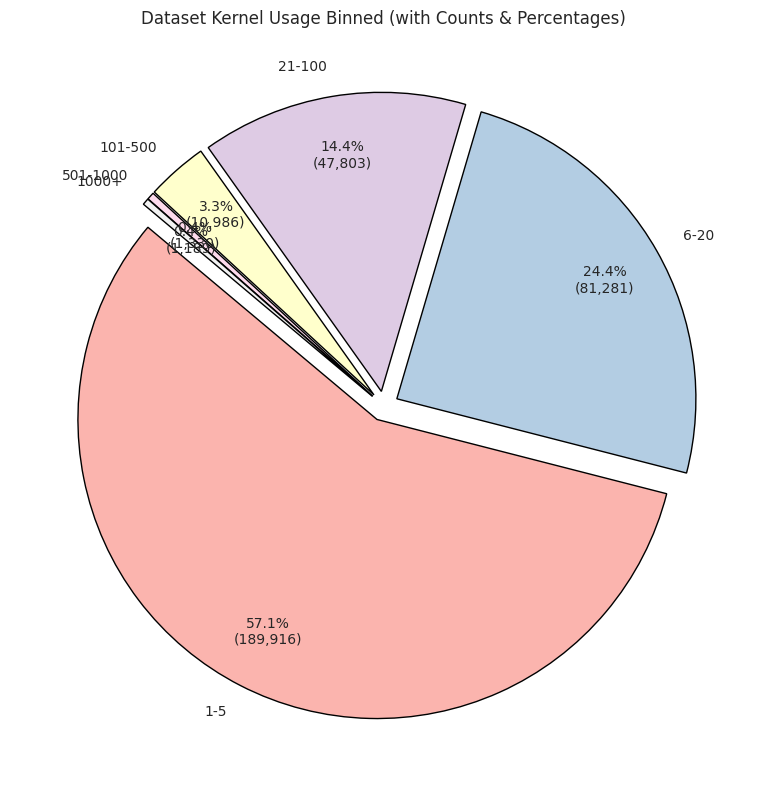

In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# 1️⃣ Count kernels per dataset
dataset_usage = kernel_version_dataset_sources.groupby('SourceDatasetVersionId')['KernelVersionId'].count().reset_index()
dataset_usage.rename(columns={'KernelVersionId': 'KernelCount'}, inplace=True)

# 2️⃣ Bin dataset counts
bins = [0, 5, 20, 100, 500, 1000, dataset_usage['KernelCount'].max()]
labels = ['1-5', '6-20', '21-100', '101-500', '501-1000', '1000+']
dataset_usage['UsageBin'] = pd.cut(dataset_usage['KernelCount'], bins=bins, labels=labels, right=True)

# 3️⃣ Count datasets in each bin
bin_counts = dataset_usage['UsageBin'].value_counts().sort_index()

colors = plt.cm.Pastel1(np.linspace(0, 1, len(bin_counts)))
explode = [0.05] * len(bin_counts)  # Slight separation for all slices

fig, ax = plt.subplots(figsize=(8, 8))
wedges, texts, autotexts = ax.pie(
    bin_counts,
    labels=bin_counts.index,
    autopct=lambda pct: f'{pct:.1f}%\n({int(pct/100.*bin_counts.sum()):,})',
    startangle=140,
    colors=colors,
    explode=explode,
    pctdistance=0.8,
    labeldistance=1.1,
    wedgeprops={'edgecolor': 'black'}
)

# Styling
for text in texts + autotexts:
    text.set_fontsize(10)

plt.title('Dataset Kernel Usage Binned (with Counts & Percentages)')
plt.tight_layout()
plt.show()

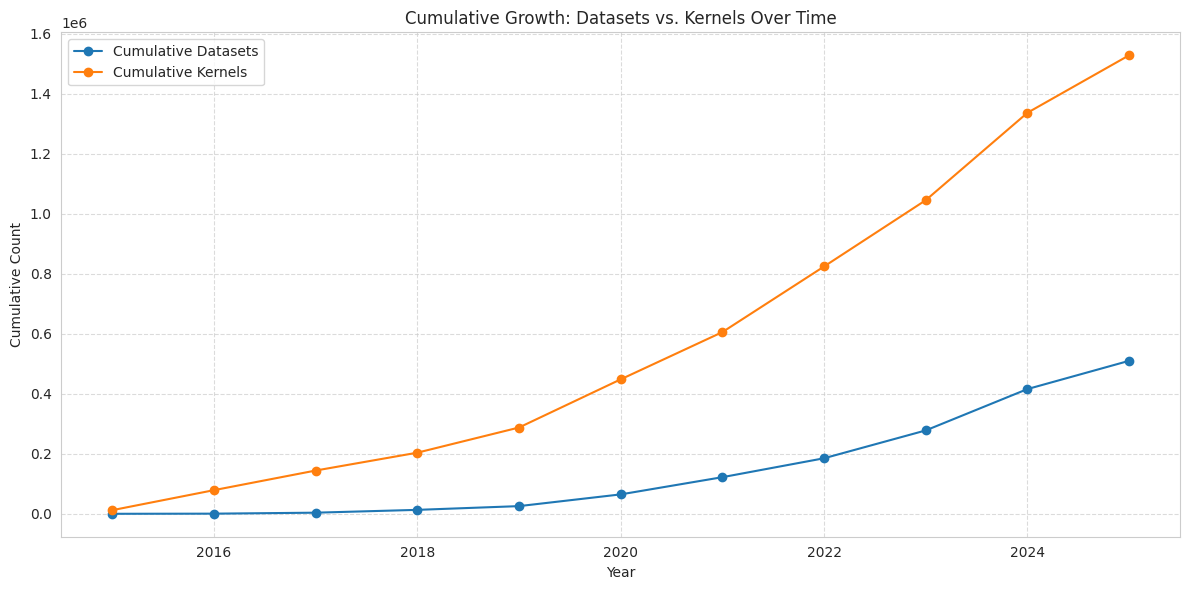

In [29]:
# --- Dataset Growth ---
datasets['Year'] = pd.to_datetime(datasets['CreationDate']).dt.year
dataset_counts = datasets.groupby('Year').size().cumsum()

# --- Kernel Growth ---
kernels['Year'] = pd.to_datetime(kernels['CreationDate']).dt.year
kernel_counts = kernels.groupby('Year').size().cumsum()

# --- Plot ---
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.plot(dataset_counts.index, dataset_counts.values, marker='o', label='Cumulative Datasets')
plt.plot(kernel_counts.index, kernel_counts.values, marker='o', label='Cumulative Kernels')

plt.title('Cumulative Growth: Datasets vs. Kernels Over Time')
plt.xlabel('Year')
plt.ylabel('Cumulative Count')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

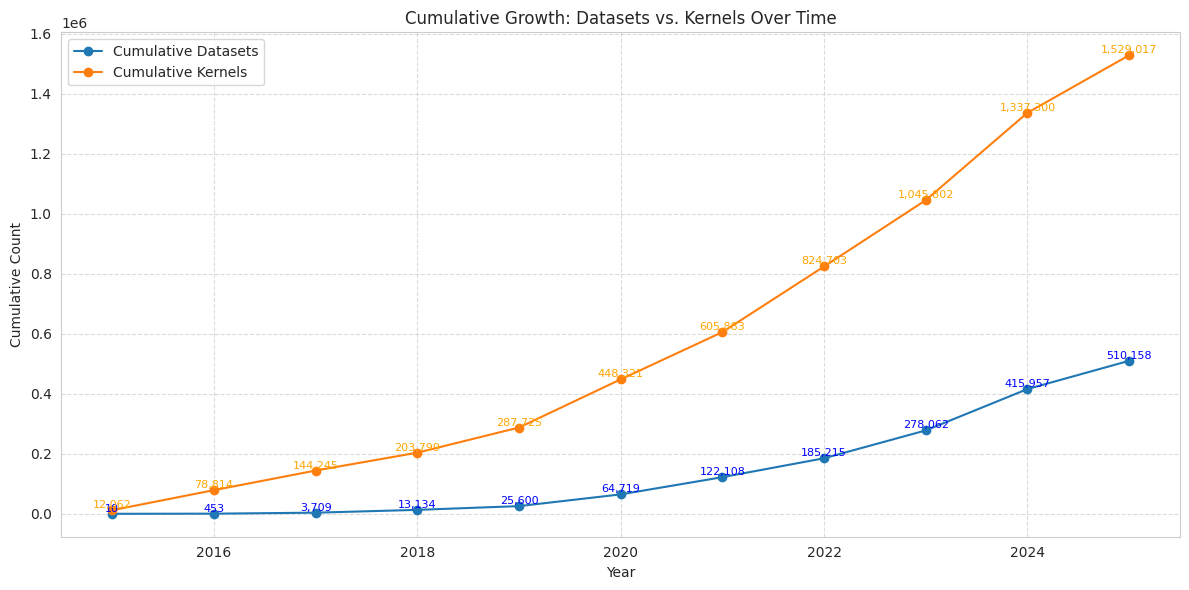

In [30]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.plot(dataset_counts.index, dataset_counts.values, marker='o', label='Cumulative Datasets')
plt.plot(kernel_counts.index, kernel_counts.values, marker='o', label='Cumulative Kernels')

# Add numbers on the lines
for x, y in zip(dataset_counts.index, dataset_counts.values):
    plt.text(x, y, f"{int(y):,}", ha='center', va='bottom', fontsize=8, color='blue')

for x, y in zip(kernel_counts.index, kernel_counts.values):
    plt.text(x, y, f"{int(y):,}", ha='center', va='bottom', fontsize=8, color='orange')

plt.title('Cumulative Growth: Datasets vs. Kernels Over Time')
plt.xlabel('Year')
plt.ylabel('Cumulative Count')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

## Starting with HostSegmentTitle and Kernels is a simple and impactful way to understand which segments on Kaggle drive more kernel activity.


In [31]:
# Merge kernel_versions to competitions through comp_sources
kernel_comp = kernel_versions.merge(kernel_version_comp_sources, 
                                    left_on='Id', right_on='KernelVersionId')

# Bring in HostSegmentTitle from competitions
kernel_comp = kernel_comp.merge(competitions[['Id', 'HostSegmentTitle']], 
                                left_on='SourceCompetitionId', right_on='Id')

# Join with kernels for CreationDate
kernel_with_dates = kernels[['Id', 'CreationDate']].rename(columns={'Id': 'KernelId'})
kernel_comp = kernel_comp.merge(kernel_with_dates, left_on='ScriptId', right_on='KernelId')

In [32]:
kernel_comp.iloc[0]

Id_x                                                  2772
ScriptId                                               599
ParentScriptVersionId                                  NaN
ScriptLanguageId                                         1
AuthorUserId                                           368
CreationDate_x                         2015-04-25 01:43:35
VersionNumber                                         32.0
Title                         What drives demand for bikes
EvaluationDate                                  04/25/2015
IsChange                                              True
TotalLines                                           135.0
LinesInsertedFromPrevious                              0.0
LinesChangedFromPrevious                               1.0
LinesUnchangedFromPrevious                           134.0
LinesInsertedFromFork                                 83.0
LinesDeletedFromFork                                  18.0
LinesChangedFromFork                                   1

In [33]:
# Extract Year
kernel_comp['Year'] = pd.to_datetime(kernel_comp['CreationDate_x']).dt.year

# Aggregate number of kernels per Year per HostSegmentTitle
host_trend = kernel_comp.groupby(['Year', 'HostSegmentTitle']).size().unstack(fill_value=0)

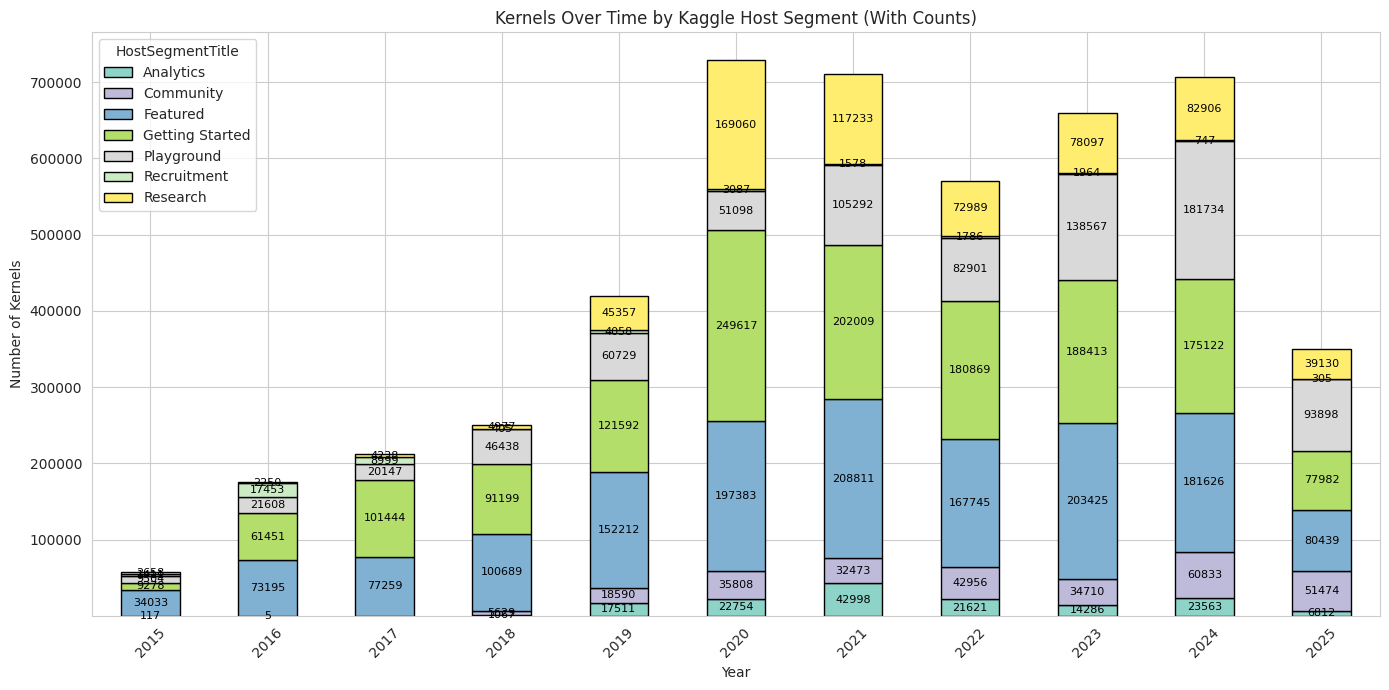

In [34]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plot again with counts on bars
sns.set_style("whitegrid")
ax = host_trend.plot(kind='bar', 
                     stacked=True, 
                     figsize=(14, 7), 
                     edgecolor='black',
                     cmap='Set3')

# Add counts on each stack
for container in ax.containers:
    ax.bar_label(container, label_type='center', fontsize=8, color='black')

# Aesthetics
plt.ylabel("Number of Kernels")
plt.title("Kernels Over Time by Kaggle Host Segment (With Counts)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [35]:
# Merge kernel versions -> competition sources
kernel_comp = kernel_versions.merge(kernel_version_comp_sources, left_on='Id', right_on='KernelVersionId', how='left')

# Merge competitions
kernel_comp = kernel_comp.merge(competitions[['Id', 'business_industry', 'technical_category', 'model_concept', 'evaluation_metric']],
                                left_on='SourceCompetitionId', right_on='Id', how='left')

# Extract year
kernel_comp['Year'] = pd.to_datetime(kernel_comp['CreationDate']).dt.year

In [36]:
kernel_comp.iloc[0]

Id_x                                                         2772
ScriptId                                                      599
ParentScriptVersionId                                         NaN
ScriptLanguageId                                                1
AuthorUserId                                                  368
CreationDate                                  2015-04-25 01:43:35
VersionNumber                                                32.0
Title                                What drives demand for bikes
EvaluationDate                                         04/25/2015
IsChange                                                     True
TotalLines                                                  135.0
LinesInsertedFromPrevious                                     0.0
LinesChangedFromPrevious                                      1.0
LinesUnchangedFromPrevious                                  134.0
LinesInsertedFromFork                                        83.0
LinesDelet

/tmp/ipykernel_36/4276078566.py:10: UserWarning: Glyph 36965 (\N{CJK UNIFIED IDEOGRAPH-9065}) missing from current font.
  plt.tight_layout()
/tmp/ipykernel_36/4276078566.py:10: UserWarning: Glyph 24863 (\N{CJK UNIFIED IDEOGRAPH-611F}) missing from current font.
  plt.tight_layout()
/tmp/ipykernel_36/4276078566.py:10: UserWarning: Glyph 25945 (\N{CJK UNIFIED IDEOGRAPH-6559}) missing from current font.
  plt.tight_layout()
/tmp/ipykernel_36/4276078566.py:10: UserWarning: Glyph 32946 (\N{CJK UNIFIED IDEOGRAPH-80B2}) missing from current font.
  plt.tight_layout()
/tmp/ipykernel_36/4276078566.py:10: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


<Figure size 1200x600 with 0 Axes>

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 36965 (\N{CJK UNIFIED IDEOGRAPH-9065}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 24863 (\N{CJK UNIFIED IDEOGRAPH-611F}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 25945 (\N{CJK UNIFIED IDEOGRAPH-6559}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 32946 (\N{CJK UNIFIED IDEOGRAPH-80B2}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


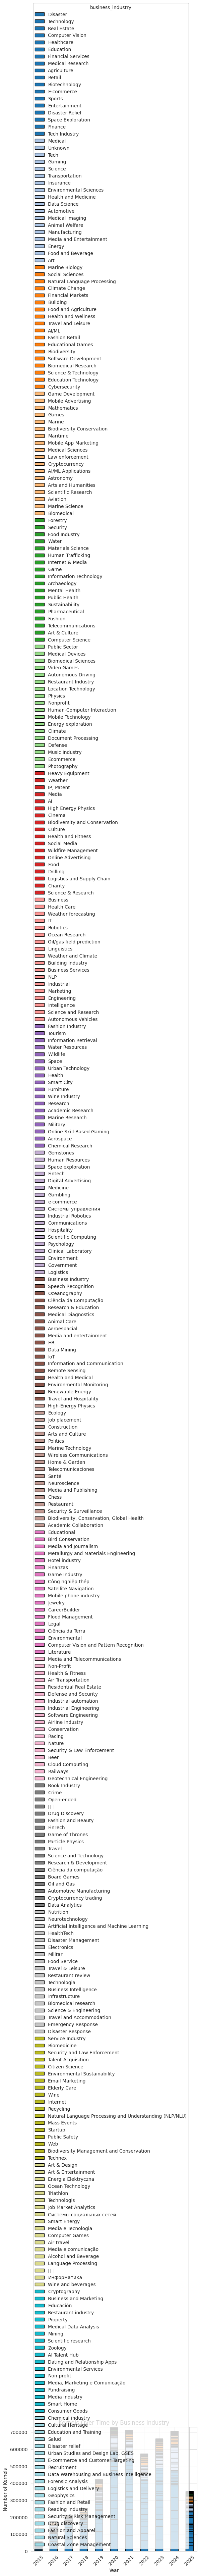

In [37]:
industry_trend = kernel_comp.groupby(['Year', 'business_industry']).size().unstack(fill_value=0)
industry_trend = industry_trend.loc[:, industry_trend.sum().sort_values(ascending=False).index]  # Sort by total

# Plot
plt.figure(figsize=(12, 6))
industry_trend.plot(kind='bar', stacked=True, colormap='tab20', edgecolor='black')
plt.ylabel('Number of Kernels')
plt.title('Kernels Over Time by Business Industry')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [38]:
# Group and count kernels by year and industry
top_per_year = kernel_comp.groupby(['Year', 'business_industry']).size().reset_index(name='Count')

# Pivot to make it suitable for stacked bar plot
pivot = top_per_year.pivot(index='Year', columns='business_industry', values='Count').fillna(0)

# Sort industries by total count
industry_totals = top_per_year.groupby('business_industry')['Count'].sum().sort_values(ascending=False)
top_industries = industry_totals.head(20).index.tolist()

# Filter to top 20 industries only
pivot_filtered = pivot[top_industries]

<Figure size 1600x900 with 0 Axes>

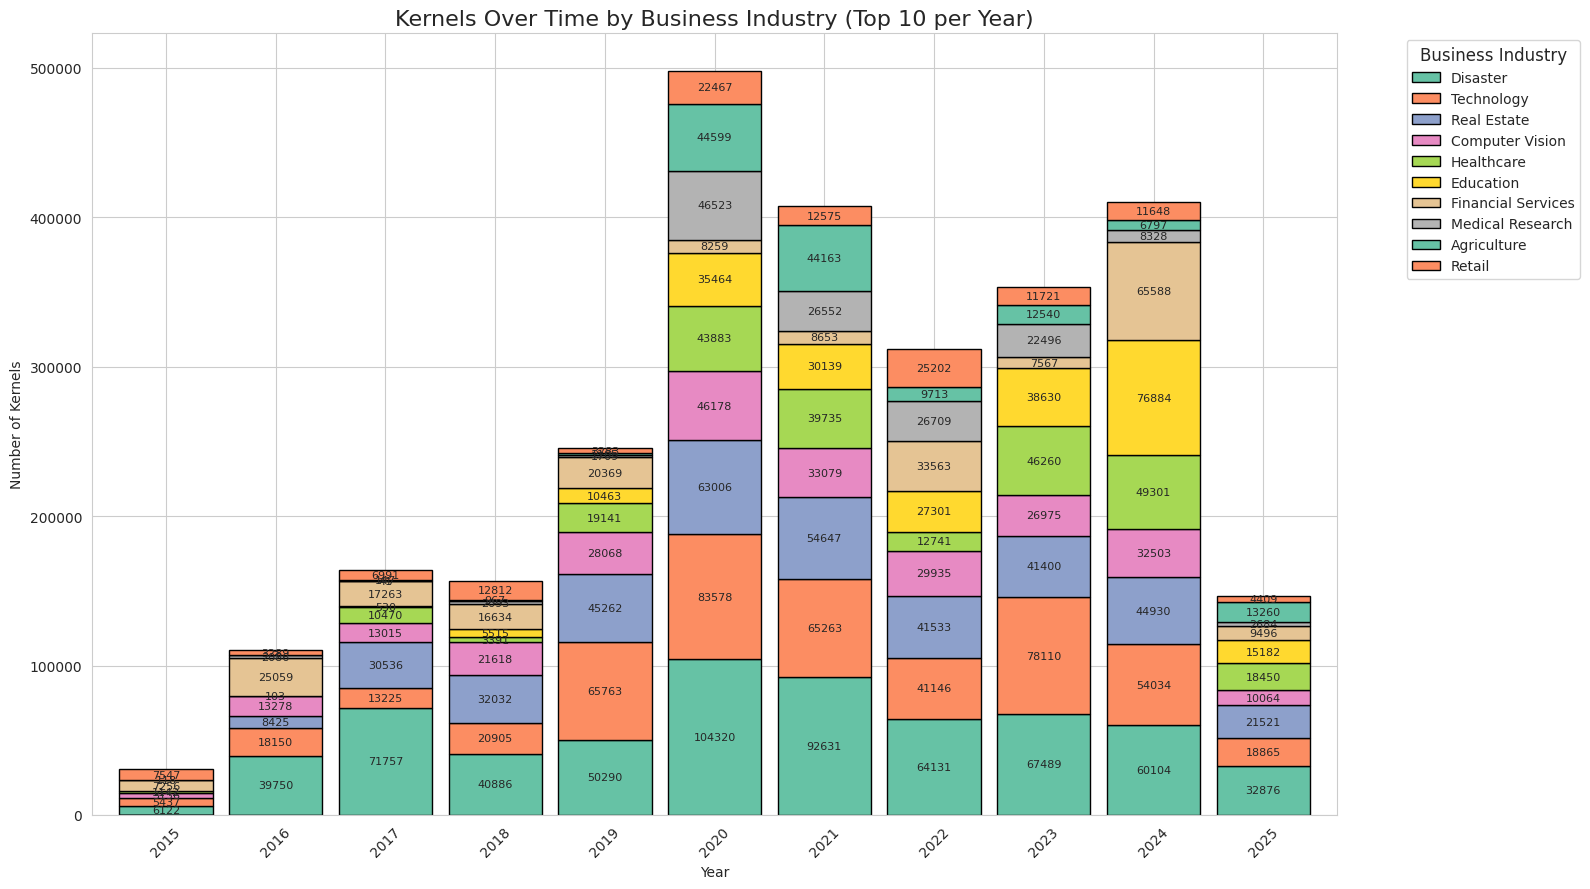

In [39]:
import matplotlib.pyplot as plt
import seaborn as sns

# Sort industries by total kernels
industry_totals = top_per_year.groupby('business_industry')['Count'].sum().sort_values(ascending=False)
top_industries = industry_totals.head(10).index.tolist()

# Filter to top industries only
pivot_filtered = pivot[top_industries]

# Plot
plt.figure(figsize=(16, 9))  # Bigger figure
colors = sns.color_palette('Set2', n_colors=len(top_industries))  # Softer color palette

ax = pivot_filtered.plot(kind='bar',
                         stacked=True,
                         color=colors,
                         edgecolor='black',
                         width=0.85,
                         figsize=(16, 9))  # Ensure figure size consistency here too

# Add labels
for container in ax.containers:
    labels = [int(v.get_height()) if v.get_height() > 0 else '' for v in container]
    ax.bar_label(container, labels=labels, label_type='center', fontsize=8)

# Aesthetics
plt.ylabel('Number of Kernels')
plt.title('Kernels Over Time by Business Industry (Top 10 per Year)', fontsize=16)
plt.xticks(rotation=45, fontsize=10)
plt.yticks(fontsize=10)

# Move legend outside
plt.legend(title='Business Industry', bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=10, title_fontsize=12)

plt.tight_layout()
plt.show()

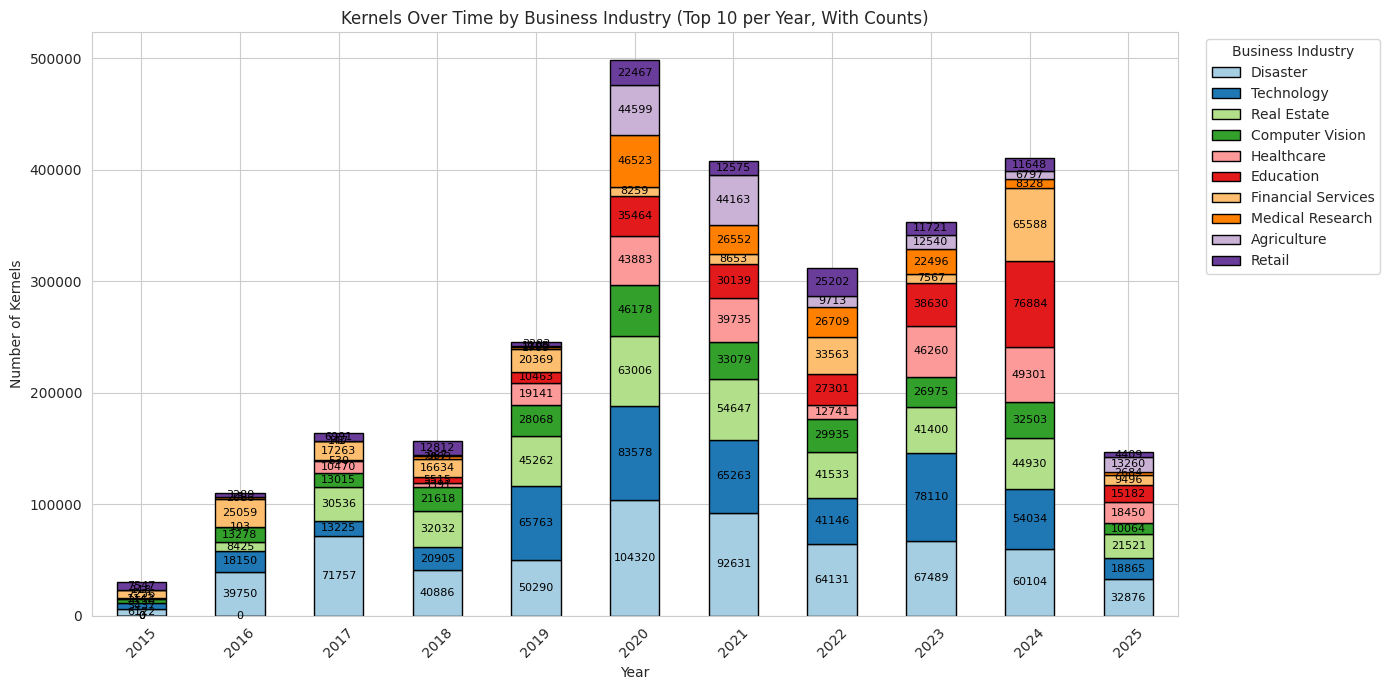

In [40]:
import seaborn as sns
import matplotlib.pyplot as plt

# Clean grid style
sns.set_style("whitegrid")

# Use 'Paired' palette for distinct colors
colors = sns.color_palette('Paired', n_colors=pivot_filtered.shape[1])

# Plot with the new color palette
ax = pivot_filtered.plot(kind='bar',
                         stacked=True,
                         figsize=(14, 7),
                         edgecolor='black',
                         color=colors)

# Add counts on bars
for container in ax.containers:
    ax.bar_label(container, label_type='center', fontsize=8, color='black')

# Aesthetics
plt.ylabel("Number of Kernels")
plt.title("Kernels Over Time by Business Industry (Top 10 per Year, With Counts)")
plt.xticks(rotation=45)

# Move legend outside
ax.legend(title='Business Industry', bbox_to_anchor=(1.02, 1), loc='upper left')

plt.tight_layout()
plt.show()

In [41]:
competitions['evaluation_metric'].value_counts()

evaluation_metric
Accuracy                                                                   1888
RMSE                                                                        758
Mean F1-Score                                                               673
Unknown                                                                     600
AUC                                                                         318
                                                                           ... 
Price Range                                                                   1
RMSE from correct answers                                                     1
Mean f1 score                                                                 1
Mean Average Precision at 0.5 and 0.95 IoU thresholds and F1 thresholds       1
Performance on LongBench benchmark                                            1
Name: count, Length: 1187, dtype: int64

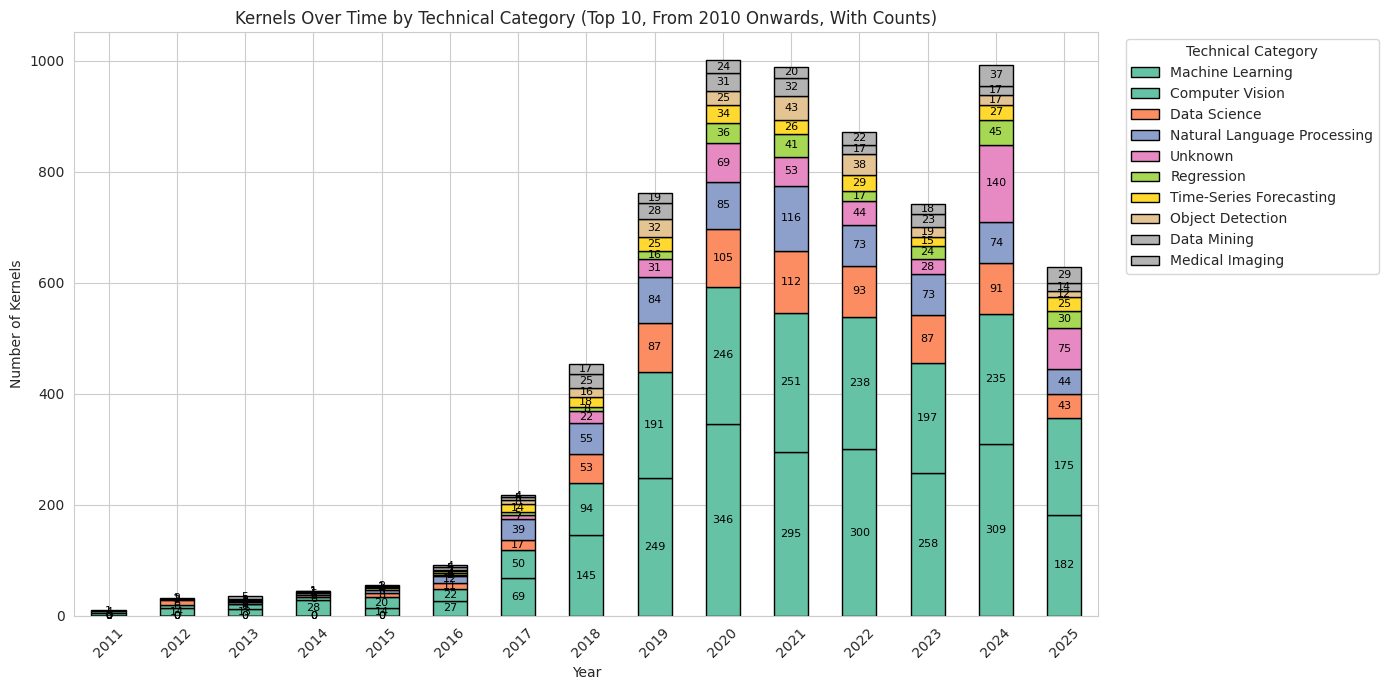

In [42]:
import seaborn as sns
import matplotlib.pyplot as plt

# Convert date and filter competitions from 2010 onwards
competitions['EnabledDate'] = pd.to_datetime(competitions['EnabledDate'], errors='coerce')
competitions = competitions[competitions['EnabledDate'].dt.year > 2010]
competitions['Year'] = competitions['EnabledDate'].dt.year

# Group and pivot
technical_trend = competitions.groupby(['Year', 'technical_category']).size().unstack(fill_value=0)

# Optional: Focus on top 10 technical categories over all years
top_categories = technical_trend.sum().sort_values(ascending=False).head(10).index
pivot_filtered = technical_trend[top_categories]

# Plot
sns.set_style("whitegrid")
ax = pivot_filtered.plot(kind='bar',
                         stacked=True,
                         figsize=(14, 7),
                         edgecolor='black',
                         cmap='Set2')  # Better colors for clarity

# Add counts on bars
for container in ax.containers:
    ax.bar_label(container, label_type='center', fontsize=8, color='black')

# Aesthetics
plt.ylabel("Number of Kernels")
plt.title("Kernels Over Time by Technical Category (Top 10, From 2010 Onwards, With Counts)")
plt.xticks(rotation=45)
ax.legend(title='Technical Category', bbox_to_anchor=(1.02, 1), loc='upper left')

plt.tight_layout()
plt.show()

In [43]:
competitions.iloc[0]

Id                                                                               2478
Slug                                                                        stayalert
Title                                                  Stay Alert! The Ford Challenge
Subtitle                            Driving while not alert can be deadly. The obj...
HostSegmentTitle                                                             Featured
ForumId                                                                          33.0
OrganizationId                                                                    NaN
EnabledDate                                                       2011-01-19 00:00:00
DeadlineDate                                                      03/09/2011 13:00:00
ProhibitNewEntrantsDeadlineDate                                                   NaN
TeamMergerDeadlineDate                                                            NaN
TeamModelDeadlineDate                                 

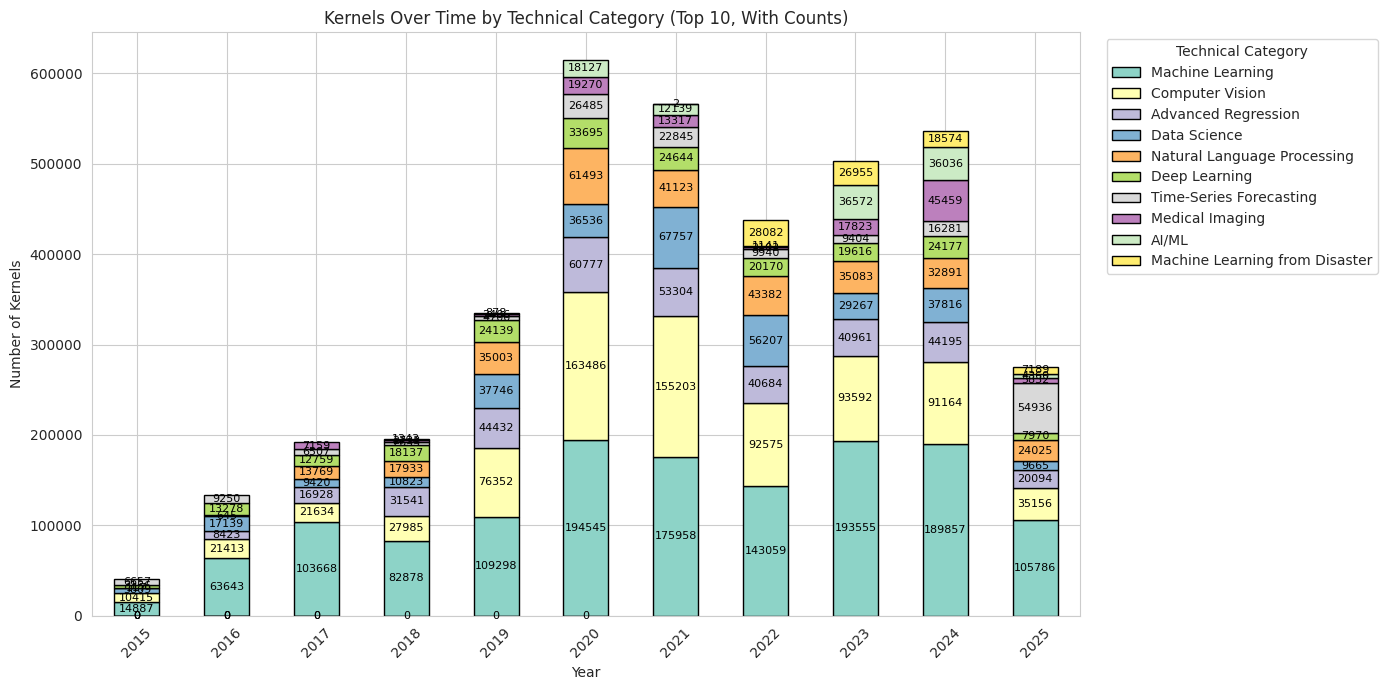

In [44]:
import seaborn as sns
import matplotlib.pyplot as plt

# Merge kernel versions -> competition sources
kernel_comp = kernel_versions.merge(kernel_version_comp_sources,
                                    left_on='Id',
                                    right_on='KernelVersionId',
                                    how='left')

# Merge competitions for technical category
kernel_comp = kernel_comp.merge(competitions[['Id', 'business_industry', 'technical_category', 'model_concept', 'evaluation_metric']],
                                left_on='SourceCompetitionId',
                                right_on='Id',
                                how='left')

# Extract Year
kernel_comp['Year'] = pd.to_datetime(kernel_comp['CreationDate'], errors='coerce').dt.year
kernel_comp = kernel_comp[kernel_comp['Year'] > 2010]

# Pivot for technical category
tech_trend = kernel_comp.groupby(['Year', 'technical_category']).size().unstack(fill_value=0)
tech_trend = tech_trend.loc[:, tech_trend.sum().sort_values(ascending=False).index]  # Sort by total

# Select top 10 categories
top_categories = tech_trend.sum().sort_values(ascending=False).head(10).index.tolist()
pivot_filtered = tech_trend[top_categories]

# Plot
sns.set_style("whitegrid")
ax = pivot_filtered.plot(kind='bar',
                         stacked=True,
                         figsize=(14, 7),
                         edgecolor='black',
                         cmap='Set3')

# Add counts on bars
for container in ax.containers:
    ax.bar_label(container, label_type='center', fontsize=8, color='black')

# Aesthetics
plt.ylabel("Number of Kernels")
plt.title("Kernels Over Time by Technical Category (Top 10, With Counts)")
plt.xticks(rotation=45)
ax.legend(title='Technical Category', bbox_to_anchor=(1.02, 1), loc='upper left')

plt.tight_layout()
plt.show()

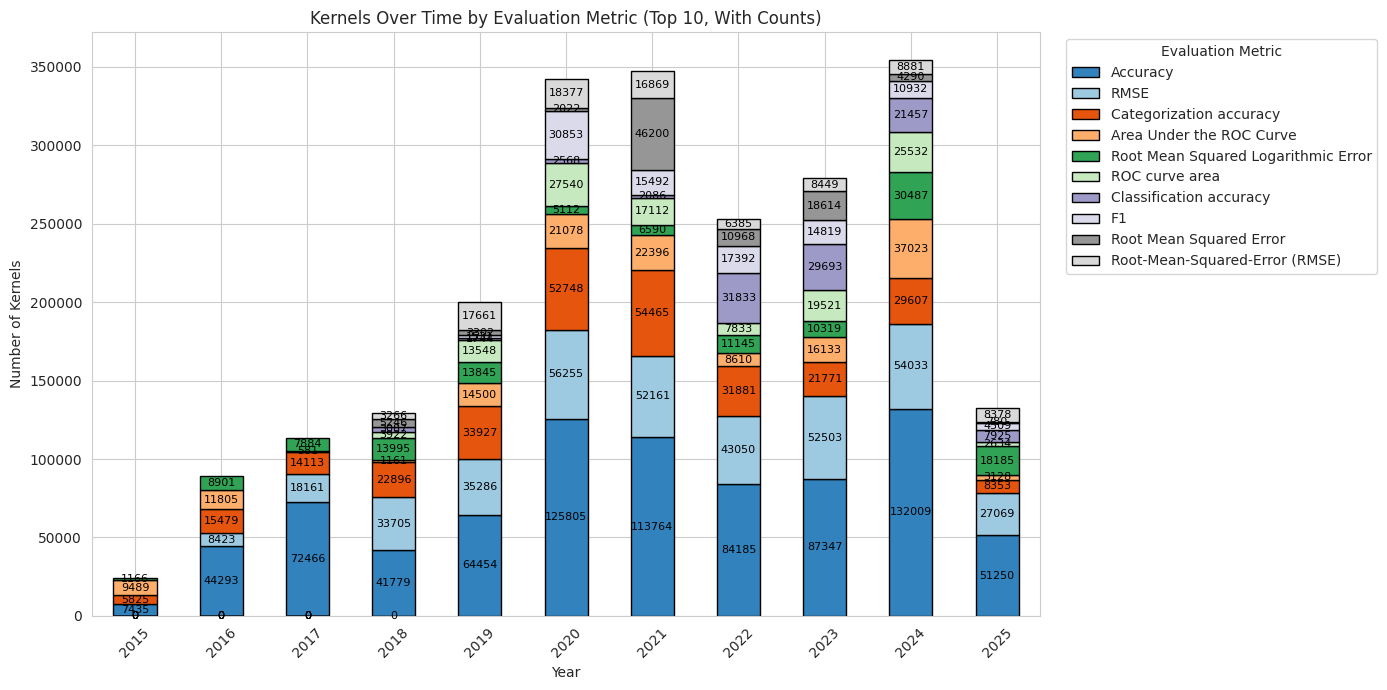

In [45]:
import seaborn as sns
import matplotlib.pyplot as plt

# Merge kernel versions -> competition sources
kernel_comp = kernel_versions.merge(kernel_version_comp_sources,
                                    left_on='Id',
                                    right_on='KernelVersionId',
                                    how='left')

# Merge competitions for evaluation metric
kernel_comp = kernel_comp.merge(competitions[['Id', 'business_industry', 'technical_category', 'model_concept', 'evaluation_metric']],
                                left_on='SourceCompetitionId',
                                right_on='Id',
                                how='left')

# Extract Year and filter
kernel_comp['Year'] = pd.to_datetime(kernel_comp['CreationDate'], errors='coerce').dt.year
kernel_comp = kernel_comp[kernel_comp['Year'] > 2010]

# Pivot for evaluation metric
eval_trend = kernel_comp.groupby(['Year', 'evaluation_metric']).size().unstack(fill_value=0)
eval_trend = eval_trend.loc[:, eval_trend.sum().sort_values(ascending=False).index]  # Sort by total

# Select top 10 evaluation metrics
top_metrics = eval_trend.sum().sort_values(ascending=False).head(10).index.tolist()
pivot_filtered = eval_trend[top_metrics]

# Plot
sns.set_style("whitegrid")
ax = pivot_filtered.plot(kind='bar',
                         stacked=True,
                         figsize=(14, 7),
                         edgecolor='black',
                         cmap='tab20c')

# Add counts on bars
for container in ax.containers:
    ax.bar_label(container, label_type='center', fontsize=8, color='black')

# Aesthetics
plt.ylabel("Number of Kernels")
plt.title("Kernels Over Time by Evaluation Metric (Top 10, With Counts)")
plt.xticks(rotation=45)
ax.legend(title='Evaluation Metric', bbox_to_anchor=(1.02, 1), loc='upper left')

plt.tight_layout()
plt.show()

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  

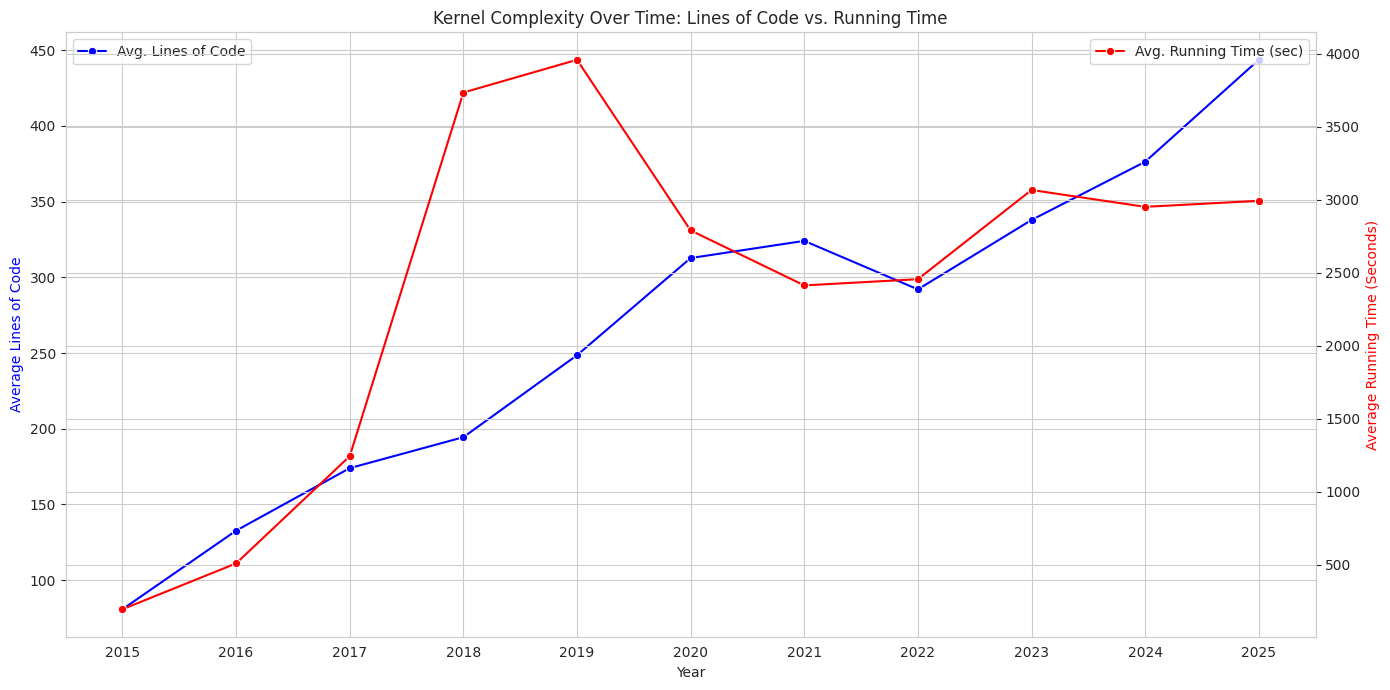

In [46]:
import seaborn as sns
import matplotlib.pyplot as plt

# Extract Year
kernel_versions['Year'] = pd.to_datetime(kernel_versions['CreationDate'], errors='coerce').dt.year
kernel_versions = kernel_versions[kernel_versions['Year'] > 2010]

# Group by Year and calculate average TotalLines and RunningTime
complexity_trend = kernel_versions.groupby('Year').agg({
    'TotalLines': 'mean',
    'RunningTimeInMilliseconds': 'mean'
}).reset_index()

# Convert running time from ms to seconds for better readability
complexity_trend['RunningTimeSeconds'] = complexity_trend['RunningTimeInMilliseconds'] / 1000

# Plot Lines of Code Trend
sns.set_style("whitegrid")
fig, ax1 = plt.subplots(figsize=(14, 7))

sns.lineplot(data=complexity_trend, x='Year', y='TotalLines', marker='o', ax=ax1, color='b', label='Avg. Lines of Code')
ax1.set_ylabel('Average Lines of Code', color='b')

# Secondary axis for Running Time
ax2 = ax1.twinx()
sns.lineplot(data=complexity_trend, x='Year', y='RunningTimeSeconds', marker='o', ax=ax2, color='r', label='Avg. Running Time (sec)')
ax2.set_ylabel('Average Running Time (Seconds)', color='r')

# Titles and Aesthetics
plt.title('Kernel Complexity Over Time: Lines of Code vs. Running Time')
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')
plt.xticks(complexity_trend['Year'])
plt.tight_layout()
plt.show()

In [47]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Prepare data (reuse previous)
kernel_versions['Year'] = pd.to_datetime(kernel_versions['CreationDate'], errors='coerce').dt.year
kernel_versions = kernel_versions[kernel_versions['Year'] > 2010]

kernel_comp = kernel_versions.merge(kernel_version_comp_sources, left_on='Id', right_on='KernelVersionId', how='left')
kernel_comp = kernel_comp.merge(competitions[['Id', 'technical_category']],
                                left_on='SourceCompetitionId', right_on='Id', how='left')

lines_trend = kernel_comp.groupby(['Year', 'technical_category'])['TotalLines'].sum().reset_index()
pivot = lines_trend.pivot(index='Year', columns='technical_category', values='TotalLines').fillna(0)
top_tech = pivot.sum().sort_values(ascending=False).head(10).index
pivot = pivot[top_tech]
pivot_cumsum = pivot.cumsum()

# # Plot
# sns.set_style("whitegrid")
# fig, ax = plt.subplots(figsize=(18, 10))

# # Plot lines with markers
# for column in pivot_cumsum.columns:
#     ax.plot(pivot_cumsum.index, pivot_cumsum[column], marker='o', linewidth=2, label=column)

#     # Annotate points with values
#     for x, y in zip(pivot_cumsum.index, pivot_cumsum[column]):
#         ax.text(x, y, f'{int(y):,}', fontsize=8, ha='center', va='bottom')

# # Aesthetics
# plt.title('Cumulative Lines of Code Over Time by Technical Category (Top 10)', fontsize=16)
# plt.ylabel('Cumulative Lines of Code', fontsize=12)
# plt.xlabel('Year', fontsize=12)
# plt.xticks(pivot_cumsum.index, rotation=45)
# plt.grid(True, linestyle='--', alpha=0.7)
# plt.legend(title='Technical Category', bbox_to_anchor=(1.02, 1), loc='upper left', fontsize=10)
# plt.tight_layout()

# plt.show()

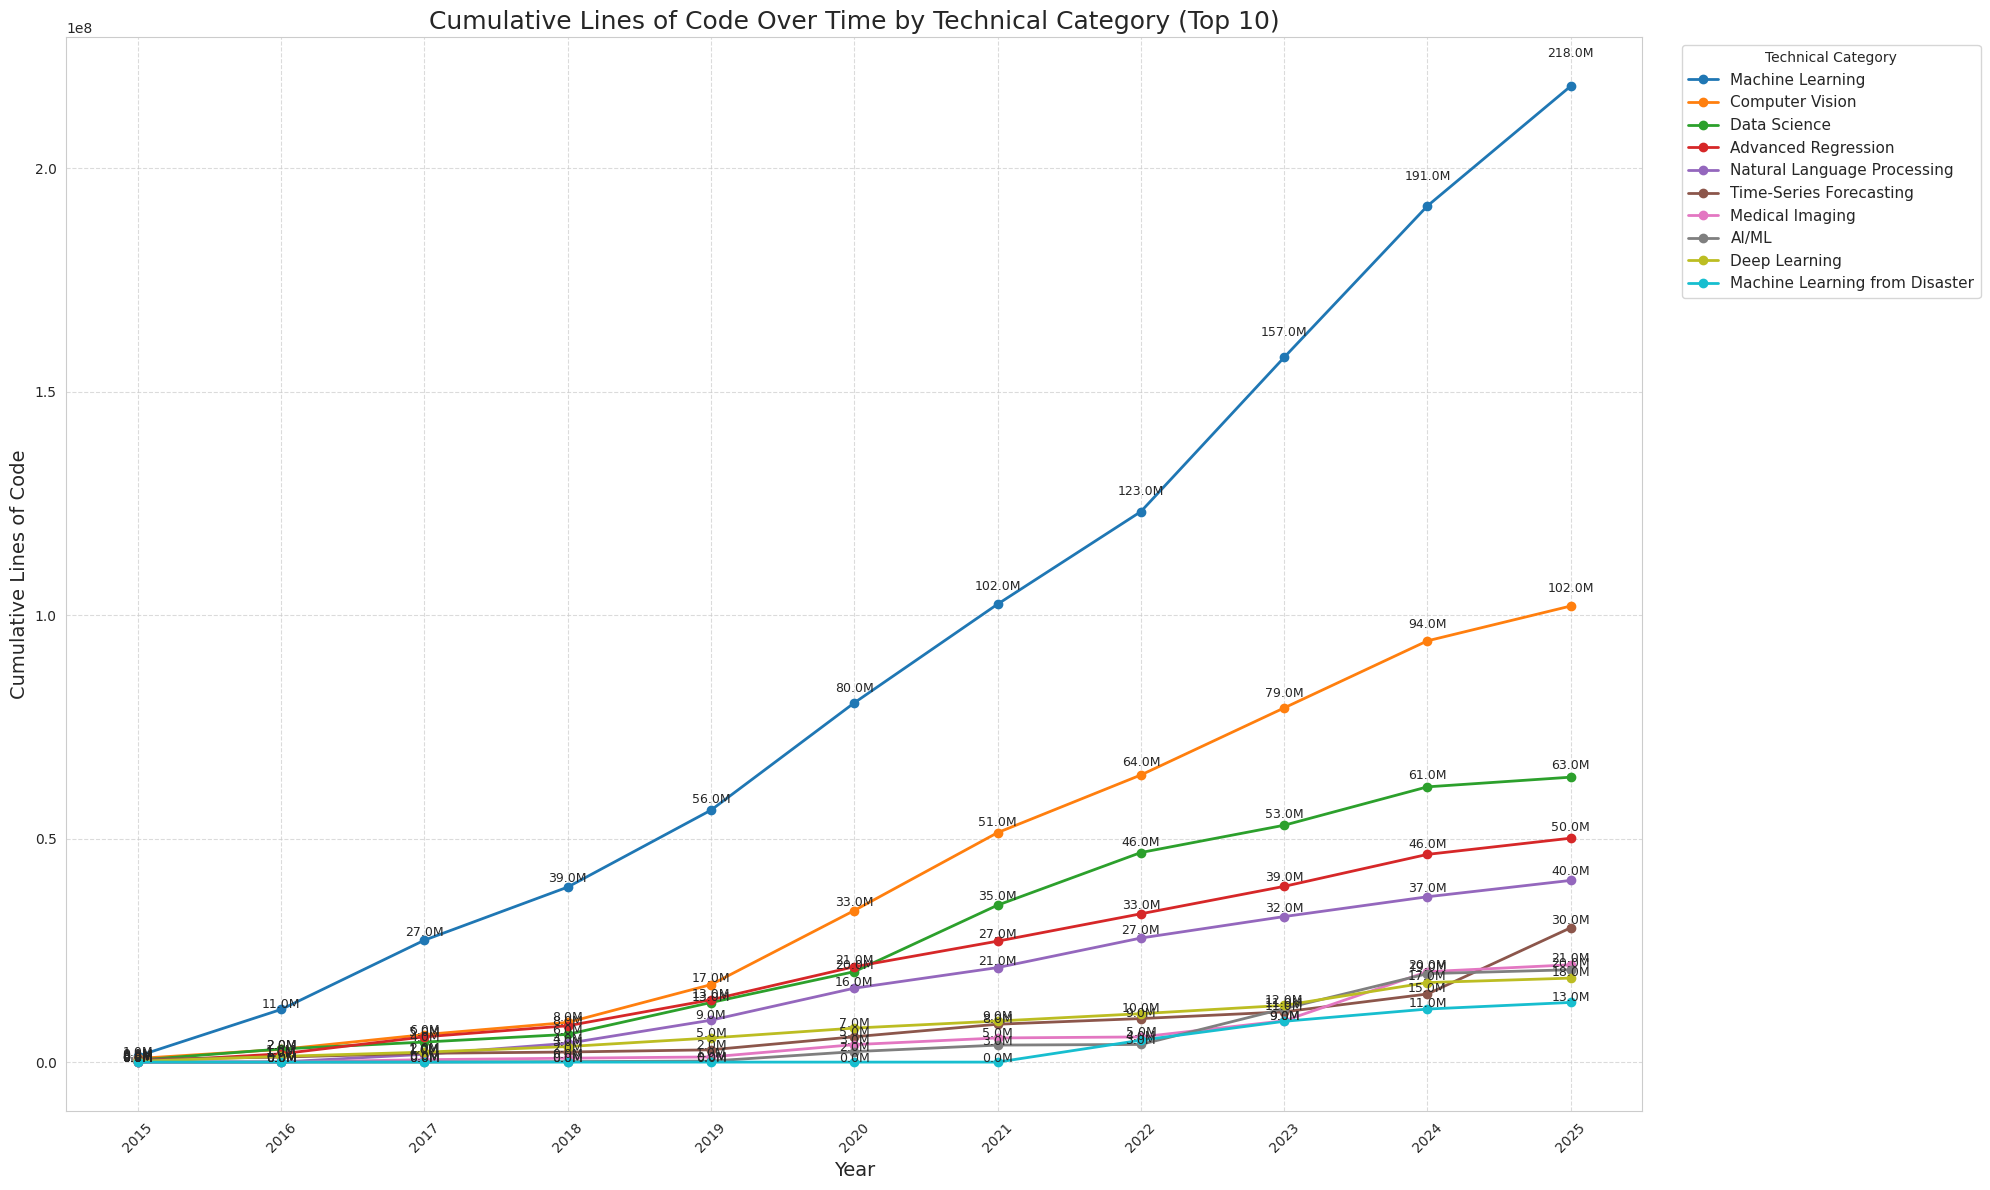

In [48]:
plt.figure(figsize=(20, 12))
sns.set_style("whitegrid")

# Plot
for column in pivot_cumsum.columns:
    plt.plot(pivot_cumsum.index, pivot_cumsum[column],
             marker='o', linewidth=2, markersize=6, label=column)

    # Annotate points with offset
    for x, y in zip(pivot_cumsum.index, pivot_cumsum[column]):
        plt.text(x, y + (y * 0.03), f'{int(y / 1e6):.1f}M', fontsize=9, ha='center')

# Aesthetics
plt.title('Cumulative Lines of Code Over Time by Technical Category (Top 10)', fontsize=18)
plt.ylabel('Cumulative Lines of Code', fontsize=14)
plt.xlabel('Year', fontsize=14)
plt.xticks(pivot_cumsum.index, rotation=45)
plt.grid(True, linestyle='--', alpha=0.7)

# Legend outside
plt.legend(title='Technical Category', bbox_to_anchor=(1.02, 1), loc='upper left', fontsize=11)
plt.tight_layout()

plt.show()

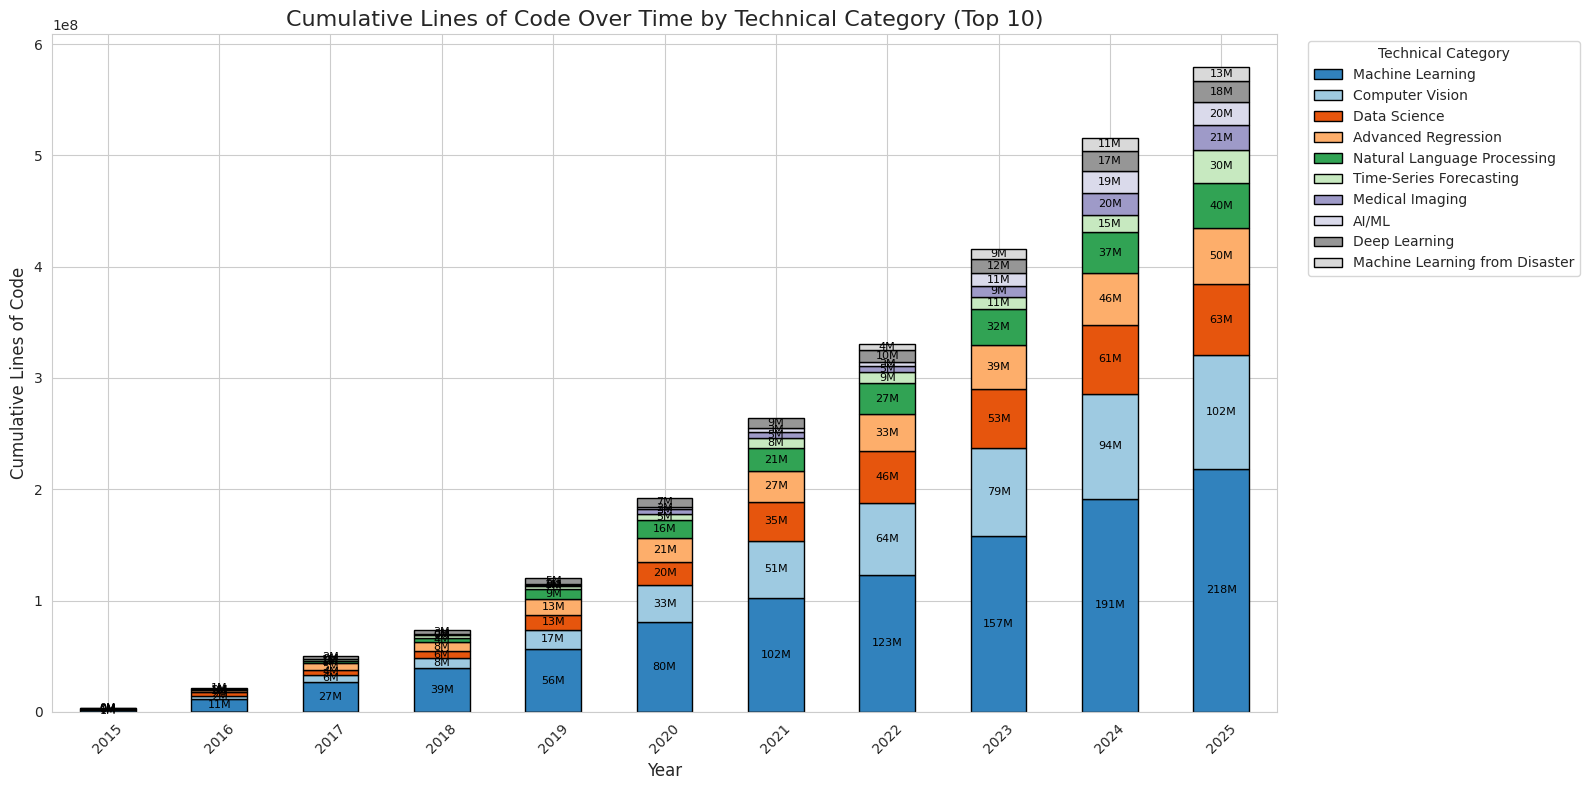

In [49]:
import matplotlib.pyplot as plt
import seaborn as sns

# Clean style
sns.set_style("whitegrid")

# Plot stacked bar
ax = pivot_cumsum.plot(kind='bar',
                       stacked=True,
                       figsize=(16, 8),
                       edgecolor='black',
                       cmap='tab20c')  # Clear color palette

# Annotate with counts (optional for last bar only for clarity)
for container in ax.containers:
    labels = [f'{int(v / 1e6)}M' if v > 0 else '' for v in container.datavalues]
    ax.bar_label(container, labels=labels, label_type='center', fontsize=8, color='black')

# Titles and labels
plt.title('Cumulative Lines of Code Over Time by Technical Category (Top 10)', fontsize=16)
plt.ylabel('Cumulative Lines of Code', fontsize=12)
plt.xlabel('Year', fontsize=12)
plt.xticks(rotation=45)

# Legend cleanly outside
ax.legend(title='Technical Category', bbox_to_anchor=(1.02, 1), loc='upper left', fontsize=10)

plt.tight_layout()
plt.show()

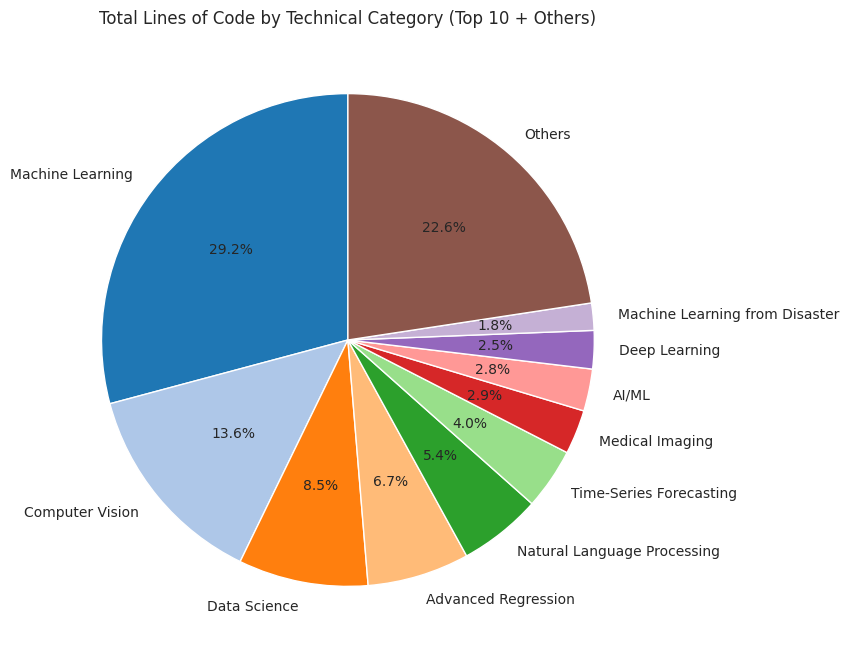

In [50]:
# Merge Kernel Versions with Kernels and Competitions for Technical Category
kernel_versions['Year'] = pd.to_datetime(kernel_versions['CreationDate'], errors='coerce').dt.year

kernel_comp = kernel_versions.merge(kernel_version_comp_sources,
                                    left_on='Id',
                                    right_on='KernelVersionId',
                                    how='left')

kernel_comp = kernel_comp.merge(competitions[['Id', 'technical_category']],
                                left_on='SourceCompetitionId',
                                right_on='Id',
                                how='left')

# Now group by technical category and sum TotalLines
total_loc_by_category = kernel_comp.groupby('technical_category')['TotalLines'].sum().sort_values(ascending=False)

# Top 10 + Others
top10 = total_loc_by_category.head(10)
others = total_loc_by_category.iloc[10:].sum()
top10['Others'] = others

# Plot
import matplotlib.pyplot as plt
import seaborn as sns

colors = sns.color_palette('tab20', n_colors=len(top10))
plt.figure(figsize=(8, 8))
top10.plot.pie(autopct='%1.1f%%', startangle=90, colors=colors, ylabel='')
plt.title('Total Lines of Code by Technical Category (Top 10 + Others)')
plt.show()

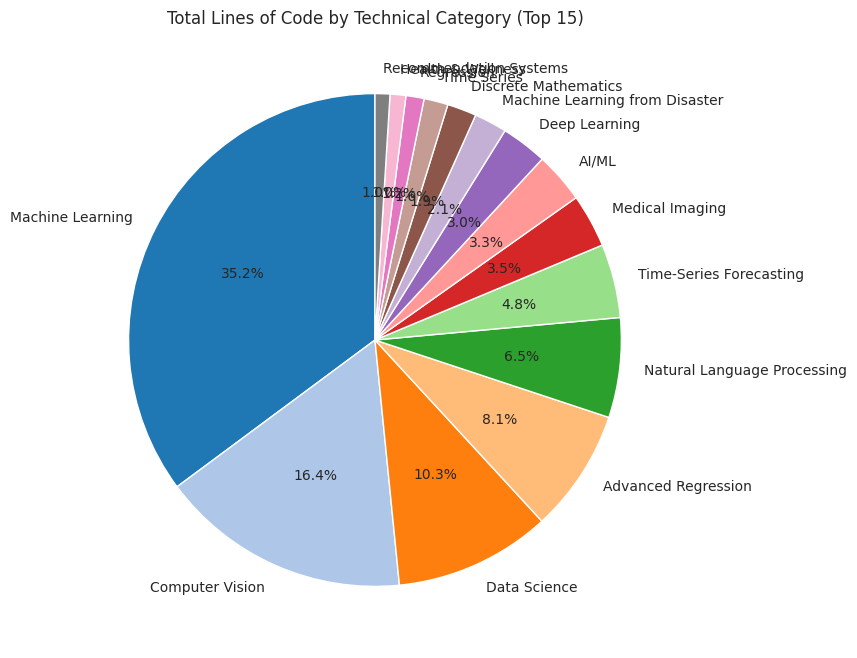

In [51]:
# Group by technical category and sum total lines of code
total_loc_by_category = kernel_comp.groupby('technical_category')['TotalLines'].sum().sort_values(ascending=False)

# Select top 15 only (no 'Others')
top15 = total_loc_by_category.head(15)

# Plot
import matplotlib.pyplot as plt
import seaborn as sns

colors = sns.color_palette('tab20', n_colors=len(top15))

plt.figure(figsize=(8, 8))
top15.plot.pie(autopct='%1.1f%%', startangle=90, colors=colors, ylabel='')
plt.title('Total Lines of Code by Technical Category (Top 15)')
plt.show()

In [52]:
kernel_comp['TotalLines'].sum()

1941343724.0

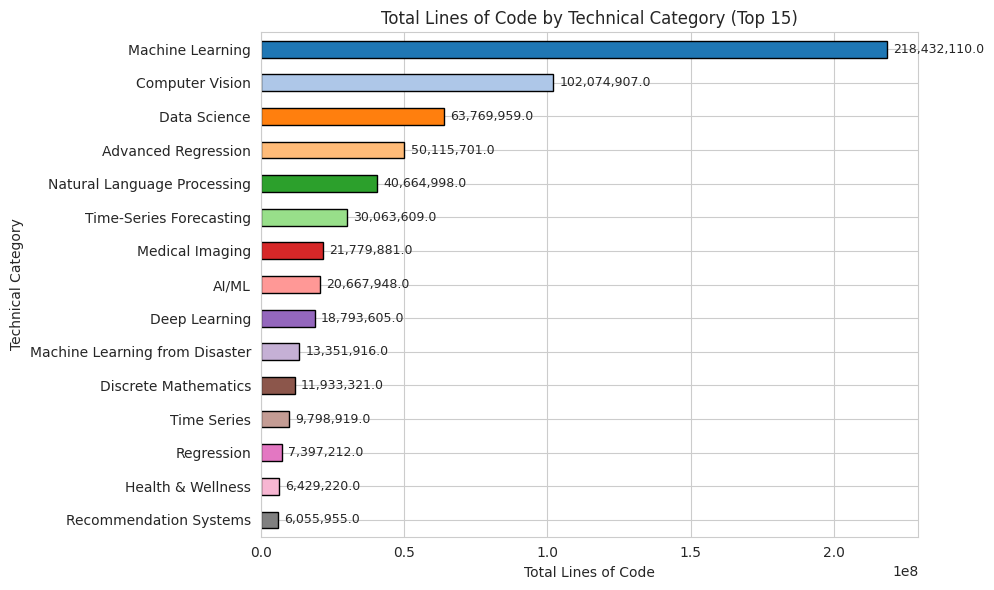

In [53]:
import matplotlib.pyplot as plt
import seaborn as sns

# Sort and take top 15 categories
total_loc_by_category = kernel_comp.groupby('technical_category')['TotalLines'].sum().sort_values(ascending=False)
top15 = total_loc_by_category.head(15)

# Plot
plt.figure(figsize=(10, 6))
colors = sns.color_palette('tab20', len(top15))

ax = top15.plot(kind='barh', color=colors, edgecolor='black')

# Add count labels
for i, v in enumerate(top15):
    ax.text(v + max(top15) * 0.01, i, f"{v:,}", va='center', fontsize=9)

# Aesthetics
plt.xlabel('Total Lines of Code')
plt.ylabel('Technical Category')
plt.title('Total Lines of Code by Technical Category (Top 15)')
plt.gca().invert_yaxis()  # Highest on top
plt.tight_layout()
plt.show()